In [ ]:
import sys
import tensorflow as tf
import torch
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings


# Suppress the SettingWithCopyWarning
#warnings.filterwarnings("ignore", category=pd.errors.SettingWithCopyWarning)

print("Python version:", sys.version)
print("TensorFlow version:", tf.__version__)
print("PyTorch version:", torch.__version__)

Python version: 3.10.12 (main, Sep 11 2024, 15:47:36) [GCC 11.4.0]
TensorFlow version: 2.17.0
PyTorch version: 2.4.1+cu121


##Drop na, null and Duplicate

In [ ]:
df1=pd.read_csv("/content/drive/MyDrive/Work_space/Kaushi/ASL_detection/data/asl-alphabet-dataset1.csv")
df2=pd.read_csv("/content/drive/MyDrive/Work_space/Kaushi/ASL_detection/data/asl-alphabet-dataset2.csv")
df3=pd.read_csv("/content/drive/MyDrive/Work_space/Kaushi/ASL_detection/data/asl-alphabet-dataset3.csv")
df4=pd.read_csv("/content/drive/MyDrive/Work_space/Kaushi/ASL_detection/data/asl-alphabet-dataset_test.csv")

df=pd.concat([df1,df2,df3,df4],axis=0,ignore_index=True)
df["label"]=df["0"]
df.drop("0",axis=1,inplace=True)
print(df.info())
df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41467 entries, 0 to 41466
Data columns (total 64 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   x0      41467 non-null  int64 
 1   x1      41467 non-null  int64 
 2   x2      41467 non-null  int64 
 3   x3      41467 non-null  int64 
 4   x4      41467 non-null  int64 
 5   x5      41467 non-null  int64 
 6   x6      41467 non-null  int64 
 7   x7      41467 non-null  int64 
 8   x8      41467 non-null  int64 
 9   x9      41467 non-null  int64 
 10  x10     41467 non-null  int64 
 11  x11     41467 non-null  int64 
 12  x12     41467 non-null  int64 
 13  x13     41467 non-null  int64 
 14  x14     41467 non-null  int64 
 15  x15     41467 non-null  int64 
 16  x16     41467 non-null  int64 
 17  x17     41467 non-null  int64 
 18  x18     41467 non-null  int64 
 19  x19     41467 non-null  int64 
 20  x20     41467 non-null  int64 
 21  y0      41467 non-null  int64 
 22  y1      41467 non-null

x0   x1   x2   x3   x4   x5   x6   x7   x8   x9  ...  z12  z13  z14  z15  \
0  164  132  118  124  141   99  128  151  165  124  ...  -35  -25  -31  -32   
1  142  189  219  219  204  186  182  181  179  142  ...  -46  -31  -38  -36   
2  142  195  244  247  213  199  194  192  187  139  ...  -74  -50  -61  -53   
3  156  193  203  191  175  160  174  181  182  122  ...  -37  -24  -30  -28   
4  209  232  238  237  242  173  189  199  202  149  ...  -22   -9  -16  -16   

   z16  z17  z18  z19  z20  label  
0  -33  -26  -31  -31  -31      N  
1  -34  -28  -34  -32  -31      N  
2  -47  -47  -51  -44  -40      N  
3  -27  -19  -25  -25  -24      N  
4  -15   -8  -13  -13  -11      N  

[5 rows x 64 columns]

In [ ]:
df.to_csv("ASl_final_landmark.csv",index=False)

In [ ]:
df.columns

Index(['x0', 'x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9', 'x10',
       'x11', 'x12', 'x13', 'x14', 'x15', 'x16', 'x17', 'x18', 'x19', 'x20',
       'y0', 'y1', 'y2', 'y3', 'y4', 'y5', 'y6', 'y7', 'y8', 'y9', 'y10',
       'y11', 'y12', 'y13', 'y14', 'y15', 'y16', 'y17', 'y18', 'y19', 'y20',
       'z0', 'z1', 'z2', 'z3', 'z4', 'z5', 'z6', 'z7', 'z8', 'z9', 'z10',
       'z11', 'z12', 'z13', 'z14', 'z15', 'z16', 'z17', 'z18', 'z19', 'z20',
       'label'],
      dtype='object')

In [ ]:
print("Null values",df.isnull().sum(axis=1))
print("Na values",df.isna().sum(axis=1))


Null values 0        0
1        0
2        0
3        0
4        0
        ..
41462    0
41463    0
41464    0
41465    0
41466    0
Length: 41467, dtype: int64
Na values 0        0
1        0
2        0
3        0
4        0
        ..
41462    0
41463    0
41464    0
41465    0
41466    0
Length: 41467, dtype: int64


In [ ]:
df.dropna(axis=0,inplace=True)
df.describe(include="all")

x0            x1            x2            x3           x4  \
count   41467.000000  41467.000000  41467.000000  41467.000000  41467.00000   
unique           NaN           NaN           NaN           NaN          NaN   
top              NaN           NaN           NaN           NaN          NaN   
freq             NaN           NaN           NaN           NaN          NaN   
mean      154.351388    171.720983    179.787421    173.132443    162.89857   
std        49.569375     42.354264     43.462246     43.611981     50.40988   
min        -8.000000      3.000000     14.000000     11.000000    -11.00000   
25%       126.000000    146.000000    158.000000    147.000000    130.00000   
50%       149.000000    174.000000    189.000000    177.000000    155.00000   
75%       180.000000    197.000000    210.000000    204.000000    202.00000   
max       329.000000    319.000000    295.000000    300.000000    310.00000   

                  x5            x6            x7            x8            x9  \
count   41467.000000  41467.000000  41467.000000  41467.000000  41467.000000   
unique           NaN           NaN           NaN           NaN           NaN   
top              NaN           NaN           NaN           NaN           NaN   
freq             NaN           NaN           NaN           NaN           NaN   
mean      162.661996    160.509152    159.709721    159.141221    148.809897   
std        34.185580     39.727499     46.802131     54.755341     24.828556   
min        18.000000     12.000000      9.000000    -11.000000     18.000000   
25%       139.000000    128.000000    119.000000    117.000000    137.000000   
50%       171.000000    170.000000    172.000000    172.000000    150.000000   
75%       185.000000    189.000000    194.000000    197.000000    161.000000   
max       287.000000    295.000000    308.000000    318.000000    290.000000   

        ...           z12           z13           z14           z15  \
count   ...  41467.000000  41467.000000  41467.000000  41467.000000   
unique  ...           NaN           NaN           NaN           NaN   
top     ...           NaN           NaN           NaN           NaN   
freq    ...           NaN           NaN           NaN           NaN   
mean    ...    -14.886536     -5.593942    -13.151904    -13.693515   
std     ...     13.544213      9.782389     11.703365     11.051161   
min     ...   -122.000000    -78.000000    -96.000000    -99.000000   
25%     ...    -19.000000     -7.000000    -17.000000    -17.000000   
50%     ...    -12.000000     -3.000000    -11.000000    -12.000000   
75%     ...     -8.000000     -1.000000     -7.000000     -8.000000   
max     ...    137.000000     58.000000     88.000000     99.000000   

                 z16           z17           z18           z19           z20  \
count   41467.000000  41467.000000  41467.000000  41467.000000  41467.000000   
unique           NaN           NaN           NaN           NaN           NaN   
top              NaN           NaN           NaN           NaN           NaN   
freq             NaN           NaN           NaN           NaN           NaN   
mean      -12.086623     -6.765814    -12.379941    -12.287940    -10.906070   
std        10.972074      9.841704     11.098609     10.945236     11.138334   
min      -105.000000    -75.000000    -95.000000   -100.000000   -103.000000   
25%       -15.000000     -9.000000    -16.000000    -15.000000    -14.000000   
50%       -10.000000     -5.000000    -10.000000    -10.000000     -9.000000   
75%        -6.000000     -2.000000     -6.000000     -6.000000     -5.000000   
max       107.000000     56.000000     78.000000     87.000000     95.000000   

        label  
count   41467  
unique     28  
top         H  
freq     1593  
mean      NaN  
std       NaN  
min       NaN  
25%       NaN  
50%       NaN  
75%       NaN  
max       NaN  

[11 rows x 64 columns]

In [ ]:
df[df.duplicated(subset=['x0', 'x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9', 'x10',
       'x11', 'x12', 'x13', 'x14', 'x15', 'x16', 'x17', 'x18', 'x19', 'x20',
       'y0', 'y1', 'y2', 'y3', 'y4', 'y5', 'y6', 'y7', 'y8', 'y9', 'y10',
       'y11', 'y12', 'y13', 'y14', 'y15', 'y16', 'y17', 'y18', 'y19', 'y20',
       'z0', 'z1', 'z2', 'z3', 'z4', 'z5', 'z6', 'z7', 'z8', 'z9', 'z10',
       'z11', 'z12', 'z13', 'z14', 'z15', 'z16', 'z17', 'z18', 'z19', 'z20'])]


#df['is_duplicate'] = df.duplicated(keep=False)
#df[df['is_duplicate'] == True]

x0   x1   x2   x3   x4   x5   x6   x7   x8   x9  ...  z12  z13  z14  \
14028  171  203  216  201  187  209  200  193  185  171  ...  -42  -29  -37   
14029  164  132  118  124  141   99  128  151  165  124  ...  -35  -25  -31   
14031  142  189  219  219  204  186  182  181  179  142  ...  -46  -31  -38   
14032  142  195  244  247  213  199  194  192  187  139  ...  -74  -50  -61   
14037  156  193  203  191  175  160  174  181  182  122  ...  -37  -24  -30   
...    ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
28050  231  243  234  194  163  197  174  186  200  173  ...  -10   -2   -9   
28051  217  235  222  181  151  181  160  175  188  161  ...   -9   -1   -7   
28053  218  234  228  193  164  192  173  187  199  172  ...   -9   -2   -8   
28054  262  285  284  257  233  241  231  248  259  215  ...  -13   -4  -12   
28055  225  249  233  181  143  177  149  170  188  152  ...  -12   -1  -11   

       z15  z16  z17  z18  z19  z20  label  
14028  -33  -29  -27  -30  -26  -23      N  
14029  -32  -33  -26  -31  -31  -31      N  
14031  -36  -34  -28  -34  -32  -31      N  
14032  -53  -47  -47  -51  -44  -40      N  
14037  -28  -27  -19  -25  -25  -24      N  
...    ...  ...  ...  ...  ...  ...    ...  
28050  -10   -9   -4   -8   -9  -10      J  
28051   -8   -7   -2   -4   -5   -5      J  
28053   -9   -7   -3   -6   -6   -6      J  
28054  -14  -12   -7  -12  -14  -14      J  
28055  -13  -11   -3   -8  -11  -11      J  

[7757 rows x 64 columns]

In [ ]:
df.drop_duplicates(inplace=True)
df.describe(include="all")

x0            x1            x2            x3            x4  \
count   33710.000000  33710.000000  33710.000000  33710.000000  33710.000000   
unique           NaN           NaN           NaN           NaN           NaN   
top              NaN           NaN           NaN           NaN           NaN   
freq             NaN           NaN           NaN           NaN           NaN   
mean      153.357105    168.905933    176.147998    170.383447    161.358084   
std        49.468669     42.855114     44.803185     44.513746     50.963321   
min        -8.000000      3.000000     14.000000     11.000000    -11.000000   
25%       126.000000    141.000000    150.000000    141.000000    130.000000   
50%       149.000000    172.000000    187.000000    175.000000    154.000000   
75%       177.750000    194.000000    208.000000    203.000000    200.000000   
max       329.000000    319.000000    295.000000    300.000000    310.000000   

                  x5            x6            x7            x8            x9  \
count   33710.000000  33710.000000  33710.000000  33710.000000  33710.000000   
unique           NaN           NaN           NaN           NaN           NaN   
top              NaN           NaN           NaN           NaN           NaN   
freq             NaN           NaN           NaN           NaN           NaN   
mean      161.197419    159.557401    158.893088    158.393652    148.912993   
std        34.732438     40.125270     46.896625     54.637819     24.916346   
min        18.000000     12.000000      9.000000    -11.000000     18.000000   
25%       135.000000    126.000000    117.000000    115.000000    137.000000   
50%       170.000000    169.000000    171.000000    170.000000    150.000000   
75%       185.000000    189.000000    194.000000    197.000000    162.000000   
max       287.000000    295.000000    308.000000    318.000000    290.000000   

        ...           z12           z13           z14           z15  \
count   ...  33710.000000  33710.000000  33710.000000  33710.000000   
unique  ...           NaN           NaN           NaN           NaN   
top     ...           NaN           NaN           NaN           NaN   
freq    ...           NaN           NaN           NaN           NaN   
mean    ...    -14.937378     -5.789588    -13.464165    -13.917651   
std     ...     13.939371     10.147678     12.048288     11.329060   
min     ...   -122.000000    -78.000000    -96.000000    -99.000000   
25%     ...    -19.000000     -7.000000    -17.000000    -17.000000   
50%     ...    -12.000000     -3.000000    -11.000000    -12.000000   
75%     ...     -8.000000      0.000000     -7.000000     -8.000000   
max     ...    137.000000     58.000000     88.000000     99.000000   

                 z16           z17           z18           z19           z20  \
count   33710.000000  33710.000000  33710.000000  33710.000000  33710.000000   
unique           NaN           NaN           NaN           NaN           NaN   
top              NaN           NaN           NaN           NaN           NaN   
freq             NaN           NaN           NaN           NaN           NaN   
mean      -12.227351     -7.090448    -12.824088    -12.718896    -11.310264   
std        11.235250     10.253489     11.470251     11.311637     11.531144   
min      -105.000000    -75.000000    -95.000000   -100.000000   -103.000000   
25%       -15.000000     -9.000000    -16.000000    -16.000000    -14.000000   
50%       -10.000000     -5.000000    -11.000000    -11.000000     -9.000000   
75%        -6.000000     -2.000000     -6.000000     -7.000000     -5.000000   
max       107.000000     56.000000     78.000000     87.000000     95.000000   

        label  
count   33710  
unique     28  
top         L  
freq     1370  
mean      NaN  
std       NaN  
min       NaN  
25%       NaN  
50%       NaN  
75%       NaN  
max       NaN  

[11 rows x 64 columns]

##Group by label

In [ ]:
A=df.groupby("label").get_group("B")
print(len(A))
A.drop("label",axis=1,inplace=True)
A.head()

1582


<ipython-input-262-9f0a066cdd58>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  A.drop("label",axis=1,inplace=True)


x0   x1   x2   x3   x4   x5   x6   x7   x8   x9  ...  z11  z12  z13  \
1503  128  158  191  192  172  170  174  171  167  151  ...   -6   -8   -2   
1504  129  165  189  169  142  175  179  178  177  153  ...   -8  -11   -3   
1505  129  165  193  190  168  168  170  168  166  146  ...   -8  -10   -3   
1506  129  168  191  183  160  166  168  167  165  147  ...   -5   -7   -1   
1507  124  166  192  175  148  175  179  176  173  152  ...   -6   -9   -1   

      z14  z15  z16  z17  z18  z19  z20  
1503   -3   -5   -6   -3   -4   -4   -4  
1504   -6   -9  -11   -5   -7   -8   -9  
1505   -5   -8  -10   -4   -6   -7   -8  
1506   -3   -6   -7   -2   -4   -5   -6  
1507   -4   -7   -9   -3   -5   -6   -7  

[5 rows x 63 columns]

In [ ]:
A2=A[['x0', 'x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9', 'x10',
       'x11', 'x12', 'x13', 'x14', 'x15', 'x16', 'x17', 'x18', 'x19', 'x20',
       'y0', 'y1', 'y2', 'y3', 'y4', 'y5', 'y6', 'y7', 'y8', 'y9', 'y10',
       'y11', 'y12', 'y13', 'y14', 'y15', 'y16', 'y17', 'y18', 'y19', 'y20'

       ]]

A2.head()

x0   x1   x2   x3   x4   x5   x6   x7   x8   x9  ...  y11  y12  y13  \
8517  155  189  211  203  188  170  161  168  176  142  ...  130  159  140   
8518  175  220  244  249  249  221  224  224  225  191  ...  124  159  125   
8519  132  177  209  217  214  183  189  188  186  150  ...  133  169  136   
8520  129  178  213  218  214  181  198  197  192  150  ...  168  201  145   
8521  170  219  247  259  265  224  232  230  228  192  ...  125  163  126   

      y14  y15  y16  y17  y18  y19  y20  
8517  111  145  172  162  133  157  178  
8518   94  135  170  139  116  143  170  
8519  110  154  185  146  126  159  182  
8520  135  176  207  158  143  173  198  
8521   96  138  173  141  114  145  173  

[5 rows x 42 columns]

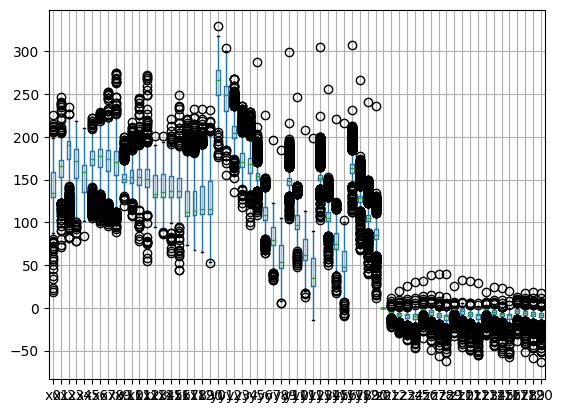

In [ ]:
import matplotlib.pyplot as plt

# Create boxplots for each column
A.boxplot(column=['x0', 'x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9', 'x10',
       'x11', 'x12', 'x13', 'x14', 'x15', 'x16', 'x17', 'x18', 'x19', 'x20',
       'y0', 'y1', 'y2', 'y3', 'y4', 'y5', 'y6', 'y7', 'y8', 'y9', 'y10',
       'y11', 'y12', 'y13', 'y14', 'y15', 'y16', 'y17', 'y18', 'y19', 'y20',
        'z0', 'z1', 'z2', 'z3', 'z4', 'z5', 'z6', 'z7', 'z8', 'z9', 'z10','z11', 'z12', 'z13', 'z14', 'z15', 'z16', 'z17', 'z18', 'z19', 'z20'
       ])
plt.show()


###IQR

In [ ]:
# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = A.quantile(0.25)
Q3 = A.quantile(0.75)
IQR = Q3 - Q1

# Define outliers as values below Q1 - 1.5*IQR or above Q3 + 1.5*IQR
outliers = (A < (Q1 - 1.5 * IQR)) | (A > (Q3 + 1.5 * IQR))


Outliers in the DataFrame:
1582

Rows with outliers:
        x0   x1   x2   x3   x4   x5   x6   x7   x8   x9  ...  z11  z12  z13  \
1508   133  163  194  193  173  174  179  177  174  152  ...   -8  -11   -3   
1509   126  162  196  191  165  177  180  177  174  152  ...  -15  -18   -5   
1517   169  201  214  196  169  222  228  230  231  200  ...  -12  -15   -6   
1520   126  162  196  193  167  176  180  177  174  151  ...  -15  -18   -5   
1521   161  193  201  164  132  190  182  173  164  162  ...   -7   -9   -3   
...    ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
40027  171  129  109  130  165  119  119  120  123  145  ...   -4   -6   -2   
40030  166  130  111  129  159  125  126  128  131  147  ...   -6   -8   -4   
40031  166  129  110  129  160  119  119  121  124  144  ...   -9  -12   -6   
40034  139  176  189  180  151  165  164  161  156  149  ...    0   -1    0   
40035  164  130  122  151  183  112  110  110  110  139  ...    5    5    7   

<ipython-input-265-75e51f6672d8>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  A["out"]=outliers.any(axis=1)
<ipython-input-265-75e51f6672d8>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_A.drop("out",axis=1,inplace=True)


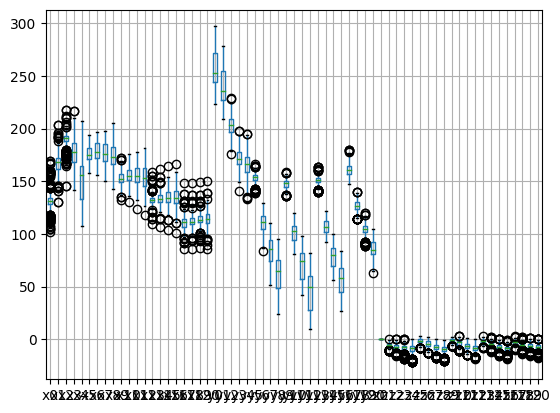

x0          x1         x2          x3          x4          x5  \
count  781.000000  781.000000  781.00000  781.000000  781.000000  781.000000   
mean   131.728553  167.485275  189.59283  175.880922  149.678617  176.208707   
std      7.981907    7.815261    6.55573   12.867267   18.591987    7.304633   
min    102.000000  130.000000  146.00000  142.000000  108.000000  158.000000   
25%    128.000000  162.000000  188.00000  168.000000  133.000000  171.000000   
50%    131.000000  168.000000  191.00000  178.000000  156.000000  175.000000   
75%    134.000000  172.000000  193.00000  186.000000  165.000000  182.000000   
max    169.000000  203.000000  218.00000  217.000000  207.000000  194.000000   

               x6          x7          x8          x9  ...         z11  \
count  781.000000  781.000000  781.000000  781.000000  ...  781.000000   
mean   178.558259  176.832266  174.149808  153.153649  ...   -6.453265   
std      8.282248    9.614294   10.908916    5.050966  ...    3.296374   
min    156.000000  150.000000  143.000000  132.000000  ...  -15.000000   
25%    172.000000  169.000000  166.000000  149.000000  ...   -8.000000   
50%    178.000000  176.000000  173.000000  152.000000  ...   -6.000000   
75%    186.000000  185.000000  183.000000  157.000000  ...   -4.000000   
max    197.000000  198.000000  205.000000  172.000000  ...    1.000000   

              z12         z13         z14        z15        z16         z17  \
count  781.000000  781.000000  781.000000  781.00000  781.00000  781.000000   
mean    -8.610755   -1.957746   -4.169014   -6.71831   -8.46991   -2.997439   
std      3.581947    1.630481    2.373381    2.77212    3.00524    1.668715   
min    -19.000000   -8.000000  -12.000000  -16.00000  -19.00000  -10.000000   
25%    -10.000000   -3.000000   -5.000000   -8.00000  -10.00000   -4.000000   
50%     -8.000000   -2.000000   -4.000000   -7.00000   -8.00000   -3.000000   
75%     -6.000000   -1.000000   -3.000000   -5.00000   -7.00000   -2.000000   
max      0.000000    3.000000    2.000000    0.00000   -1.00000    3.000000   

              z18         z19         z20  
count  781.000000  781.000000  781.000000  
mean    -4.996159   -6.012804   -6.733675  
std      2.327370    2.697072    2.939694  
min    -14.000000  -16.000000  -18.000000  
25%     -6.000000   -7.000000   -8.000000  
50%     -5.000000   -6.000000   -7.000000  
75%     -4.000000   -4.000000   -5.000000  
max      2.000000    1.000000    0.000000  

[8 rows x 63 columns]

In [ ]:

print("Outliers in the DataFrame:")
print(len(outliers))

# Show only rows with outliers
print("\nRows with outliers:")
print(A[outliers.any(axis=1)])

A["out"]=outliers.any(axis=1)

clean_A=A[A['out'] == False]
clean_A.drop("out",axis=1,inplace=True)
#print("\nClean data:")
clean_A.head()

# Create boxplots for each column
clean_A.boxplot(column=['x0', 'x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9', 'x10',
       'x11', 'x12', 'x13', 'x14', 'x15', 'x16', 'x17', 'x18', 'x19', 'x20',
       'y0', 'y1', 'y2', 'y3', 'y4', 'y5', 'y6', 'y7', 'y8', 'y9', 'y10',
       'y11', 'y12', 'y13', 'y14', 'y15', 'y16', 'y17', 'y18', 'y19', 'y20',
       'z0', 'z1', 'z2', 'z3', 'z4', 'z5', 'z6', 'z7', 'z8', 'z9', 'z10','z11', 'z12', 'z13', 'z14', 'z15', 'z16', 'z17', 'z18', 'z19', 'z20'

       ])# 'z0', 'z1', 'z2', 'z3', 'z4', 'z5', 'z6', 'z7', 'z8', 'z9', 'z10','z11', 'z12', 'z13', 'z14', 'z15', 'z16', 'z17', 'z18', 'z19', 'z20'
plt.show()
clean_A.describe()

###Iso

In [ ]:
from sklearn.ensemble import IsolationForest

# 'contamination' defines the proportion of outliers you expect in the data
iso_forest = IsolationForest(contamination=0.1, random_state=42,n_estimators=200,max_samples=512)

# Fit the model and predict
A['outlier'] = iso_forest.fit_predict(A[['x0', 'x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9', 'x10',
       'x11', 'x12', 'x13', 'x14', 'x15', 'x16', 'x17', 'x18', 'x19', 'x20',
       'y0', 'y1', 'y2', 'y3', 'y4', 'y5', 'y6', 'y7', 'y8', 'y9', 'y10',
       'y11', 'y12', 'y13', 'y14', 'y15', 'y16', 'y17', 'y18', 'y19', 'y20',
       'z0', 'z1', 'z2', 'z3', 'z4', 'z5', 'z6', 'z7', 'z8', 'z9', 'z10',
       'z11', 'z12', 'z13', 'z14', 'z15', 'z16', 'z17', 'z18', 'z19', 'z20'
       ]])

# 'outlier' column contains -1 for outliers, 1 for normal data points
#print(A)

# Show only the detected outliers
outliers = A[A['outlier'] == -1]
print("\nDetected outliers:")
print(len(outliers))

clean_a=A[A['outlier'] == 1]
print("\nClean data:")
print(len(clean_a))


Detected outliers:
159

Clean data:
1423


<ipython-input-270-79846dd9aefd>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  A['outlier'] = iso_forest.fit_predict(A[['x0', 'x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9', 'x10',


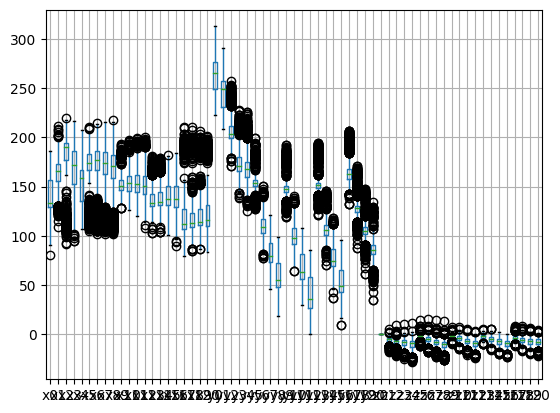

x0           x1           x2           x3           x4  \
count  1423.000000  1423.000000  1423.000000  1423.000000  1423.000000   
mean    140.170063   161.252284   175.465917   168.217850   153.211525   
std      16.759968    18.524482    32.714704    22.253565    20.055186   
min      80.000000   109.000000    92.000000    95.000000   107.000000   
25%     129.000000   156.000000   177.000000   153.000000   135.000000   
50%     133.000000   166.000000   190.000000   172.000000   159.000000   
75%     157.000000   173.000000   194.000000   186.000000   167.000000   
max     186.000000   212.000000   220.000000   217.000000   208.000000   

                x5           x6           x7           x8           x9  ...  \
count  1423.000000  1423.000000  1423.000000  1423.000000  1423.000000  ...   
mean    166.141251   167.715390   166.432186   164.533380   152.322558  ...   
std      26.273989    27.982712    27.463941    26.493108     9.331485  ...   
min     105.000000   102.000000   102.000000   102.000000   128.000000  ...   
25%     167.000000   167.000000   163.000000   159.000000   147.000000  ...   
50%     174.000000   177.000000   174.000000   171.000000   151.000000  ...   
75%     183.000000   186.000000   185.000000   182.000000   157.000000  ...   
max     211.000000   215.000000   216.000000   218.000000   193.000000  ...   

               z12          z13          z14          z15          z16  \
count  1423.000000  1423.000000  1423.000000  1423.000000  1423.000000   
mean     -9.543921    -2.588897    -4.919185    -7.614195    -9.497540   
std       4.267185     2.148906     3.024246     3.486279     3.739189   
min     -24.000000   -10.000000   -16.000000   -20.000000   -23.000000   
25%     -12.000000    -4.000000    -7.000000   -10.000000   -12.000000   
50%      -9.000000    -2.000000    -5.000000    -7.000000    -9.000000   
75%      -7.000000    -1.000000    -3.000000    -5.000000    -7.000000   
max       3.000000     5.000000     5.000000     2.000000     0.000000   

               z17          z18          z19          z20  outlier  
count  1423.000000  1423.000000  1423.000000  1423.000000   1423.0  
mean     -3.834153    -5.983837    -7.121574    -7.947997      1.0  
std       2.538710     3.204760     3.564946     3.800969      0.0  
min     -12.000000   -17.000000   -20.000000   -22.000000      1.0  
25%      -5.000000    -8.000000   -10.000000   -10.000000      1.0  
50%      -4.000000    -6.000000    -7.000000    -8.000000      1.0  
75%      -2.000000    -4.000000    -5.000000    -5.500000      1.0  
max       8.000000     8.000000     6.000000     4.000000      1.0  

[8 rows x 64 columns]

In [ ]:
# Create boxplots for each column
clean_a.boxplot(column=['x0', 'x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9', 'x10',
       'x11', 'x12', 'x13', 'x14', 'x15', 'x16', 'x17', 'x18', 'x19', 'x20',
       'y0', 'y1', 'y2', 'y3', 'y4', 'y5', 'y6', 'y7', 'y8', 'y9', 'y10',
       'y11', 'y12', 'y13', 'y14', 'y15', 'y16', 'y17', 'y18', 'y19', 'y20',
       'z0', 'z1', 'z2', 'z3', 'z4', 'z5', 'z6', 'z7', 'z8', 'z9', 'z10',
       'z11', 'z12', 'z13', 'z14', 'z15', 'z16', 'z17', 'z18', 'z19', 'z20'
       ])
plt.show()
clean_a.describe()

##ASL_DATA_EXPLORATORY

##Using the IQR (Interquartile Range) Method

In [ ]:
# Function to remove outliers based on the IQR method
def remove_outliers_IQR(df_main,label):
    df=df_main.groupby("label").get_group(label)
    print(f"Number of eliment in {label} :",len(df))

    df=df.drop("label",axis=1)

    Q1 = df.quantile(0.25)
    Q3 = df.quantile(0.75)
    IQR = Q3 - Q1
    IQR = Q3 - Q1
    # Define outliers as values below Q1 - 1.5*IQR or above Q3 + 1.5*IQR
    outliers = (df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))

    # add 1 for any outlier in row and 0 for non outlier in row
    #df["outliers"]=[1 if x else 0 for x in outliers.any(axis=1)]
    df.loc[:, "outliers"] = [1 if x else 0 for x in outliers.any(axis=1)]

    df_clean=df[df['outliers'] == 0] #filter

    print(f"Number of outliers in {label} :",len(df[df['outliers'] == 1]))
    print(f"Number of Non outliers in {label} :",len(df_clean))

    df_clean=df_clean.drop("outliers",axis=1)

    #df_clean["label"]=label
    df_clean.loc[:, "label"] = label




    return df_clean

In [ ]:
t=remove_outliers_IQR(df,"A")
t.head()

Number of eliment in A : 1419
Number of outliers in A : 665
Number of Non outliers in A : 754


x0   x1   x2   x3   x4   x5   x6   x7   x8   x9  ...  z12  z13  z14  \
8517  155  189  211  203  188  170  161  168  176  142  ...  -10   -2   -9   
8519  132  177  209  217  214  183  189  188  186  150  ...  -12   -4  -13   
8522  129  172  206  213  205  179  179  175  175  149  ...  -10   -1   -9   
8523  134  179  212  211  202  178  176  174  175  146  ...  -12   -2  -11   
8524  139  183  210  208  208  179  178  181  184  149  ...  -10   -1  -10   

      z15  z16  z17  z18  z19  z20  label  
8517   -8   -5   -4   -9   -8   -5      A  
8519  -11   -8   -5  -12  -11   -8      A  
8522   -8   -5   -2   -8   -7   -4      A  
8523  -10   -6   -4  -10   -8   -5      A  
8524   -8   -4   -3   -9   -7   -3      A  

[5 rows x 64 columns]

##Using Isolation Forest (Machine Learning Algorithm for Outliers):

In [ ]:
from sklearn.ensemble import IsolationForest

# Function to remove outliers based on the IQR method
def remove_outliers_ISO(df_main,label):
    df=df_main.groupby("label").get_group(label)
    print(f"Number of eliment in {label} :",len(df))

    df=df.drop("label",axis=1)

    # 'contamination' defines the proportion of outliers you expect in the data
    iso_forest = IsolationForest(contamination=0.2, random_state=42,n_estimators=200,max_samples=512)
    df['outliers'] = iso_forest.fit_predict(df)
    # 'outlier' column contains -1 for outliers, 1 for normal data points

    # Show only the detected outliers

    # add 1 for any outlier in row and 0 for non outlier in row

    df_clean=df[df['outliers'] == 1] #filter

    print(f"Number of outliers in {label} :",len(df[df['outliers'] == -1]))
    print(f"Number of Non outliers in {label} :",len(df_clean))

    df_clean=df_clean.drop("outliers",axis=1)

    #df_clean["label"]=label
    df_clean.loc[:, "label"] = label




    return df_clean

In [ ]:
s=remove_outliers_ISO(df,"A")
s.head()

Number of eliment in A : 1419
Number of outliers in A : 284
Number of Non outliers in A : 1135


x0   x1   x2   x3   x4   x5   x6   x7   x8   x9  ...  z12  z13  z14  \
8517  155  189  211  203  188  170  161  168  176  142  ...  -10   -2   -9   
8518  175  220  244  249  249  221  224  224  225  191  ...   -9   -1   -9   
8519  132  177  209  217  214  183  189  188  186  150  ...  -12   -4  -13   
8520  129  178  213  218  214  181  198  197  192  150  ...   -9   -1   -8   
8521  170  219  247  259  265  224  232  230  228  192  ...   -9   -1  -10   

      z15  z16  z17  z18  z19  z20  label  
8517   -8   -5   -4   -9   -8   -5      A  
8518   -9   -5   -3  -10   -9   -6      A  
8519  -11   -8   -5  -12  -11   -8      A  
8520   -8   -6   -3   -7   -5   -2      A  
8521   -9   -5   -4  -11   -9   -5      A  

[5 rows x 64 columns]

##Main function

In [ ]:
# Function to process each class
def process_class(data_frame, class_name,value_column):
    print(f"Processing class: {class_name}")
    df=data_frame.copy()
    # Filter by class
    class_df = df[df['label'] == class_name]

    # Show boxplot before removing outliers
    plt.figure(figsize=(15, 10))
    sns.boxplot(data=class_df[value_column])
    plt.title(f'Boxplot Before Removing Outliers - Class {class_name}')
    plt.show()

    # Remove outliers
    #class_df_no_outliers = remove_outliers_IQR(df_main=df,label=class_name)
    class_df_no_outliers =remove_outliers_ISO(df_main=df,label=class_name)

    # Show boxplot after removing outliers
    plt.figure(figsize=(15, 10))
    sns.boxplot(data=class_df_no_outliers[value_column])
    plt.title(f'Boxplot After Removing Outliers - Class {class_name}')
    plt.show()

    return class_df_no_outliers

# Example usage with a DataFrame
def main_exploratory(data_frame):
    # Load your dataset
    # Assuming 'Class' is the column containing class labels, and 'Value' is the column you want to check for outliers
    #df = pd.read_csv('your_dataset.csv')  # Replace with your dataset

    # List of classes to process
    classes = data_frame['label'].unique()
    Value=['x0', 'x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9', 'x10',
       'x11', 'x12', 'x13', 'x14', 'x15', 'x16', 'x17', 'x18', 'x19', 'x20',
       'y0', 'y1', 'y2', 'y3', 'y4', 'y5', 'y6', 'y7', 'y8', 'y9', 'y10',
       'y11', 'y12', 'y13', 'y14', 'y15', 'y16', 'y17', 'y18', 'y19', 'y20',
        'z0', 'z1', 'z2', 'z3', 'z4', 'z5', 'z6', 'z7', 'z8', 'z9', 'z10','z11', 'z12', 'z13', 'z14', 'z15', 'z16', 'z17', 'z18', 'z19', 'z20'
       ]
    # Process each class and store the cleaned data
    cleaned_data = pd.DataFrame()
    for class_name in classes:
        cleaned_class_df = process_class(data_frame, class_name,Value)  # Replace 'Value' with the actual column name
        cleaned_data = pd.concat([cleaned_data,cleaned_class_df],axis=0,ignore_index=True)

    print(cleaned_data.describe(include="all"))
    # Save the cleaned dataset
    cleaned_data.to_csv('ASL_cleaned_ISO_dataset.csv', index=False)


In [ ]:
outliers_IQR=main_exploratory(df)

Output hidden; open in https://colab.research.google.com to view.

Processing class: N


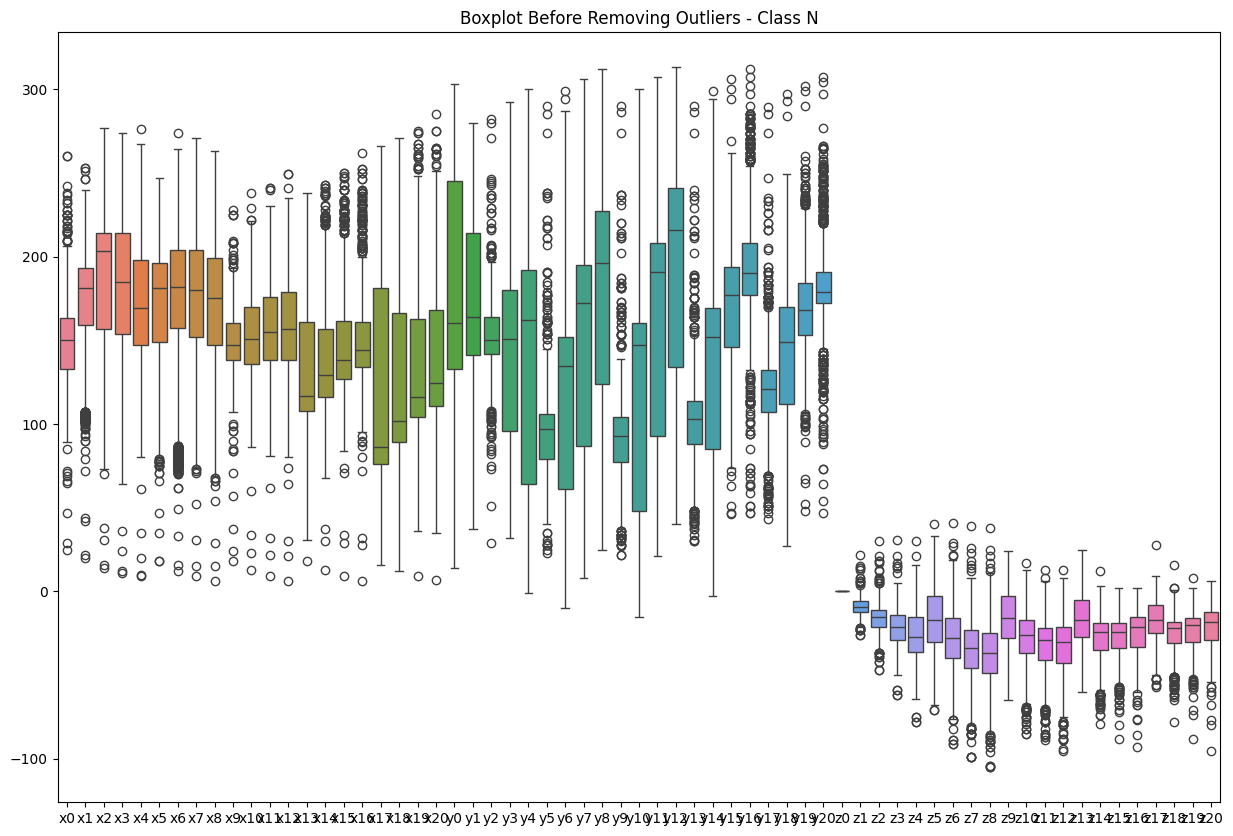

Number of eliment in N : 1486
Number of outliers in N : 297
Number of Non outliers in N : 1189


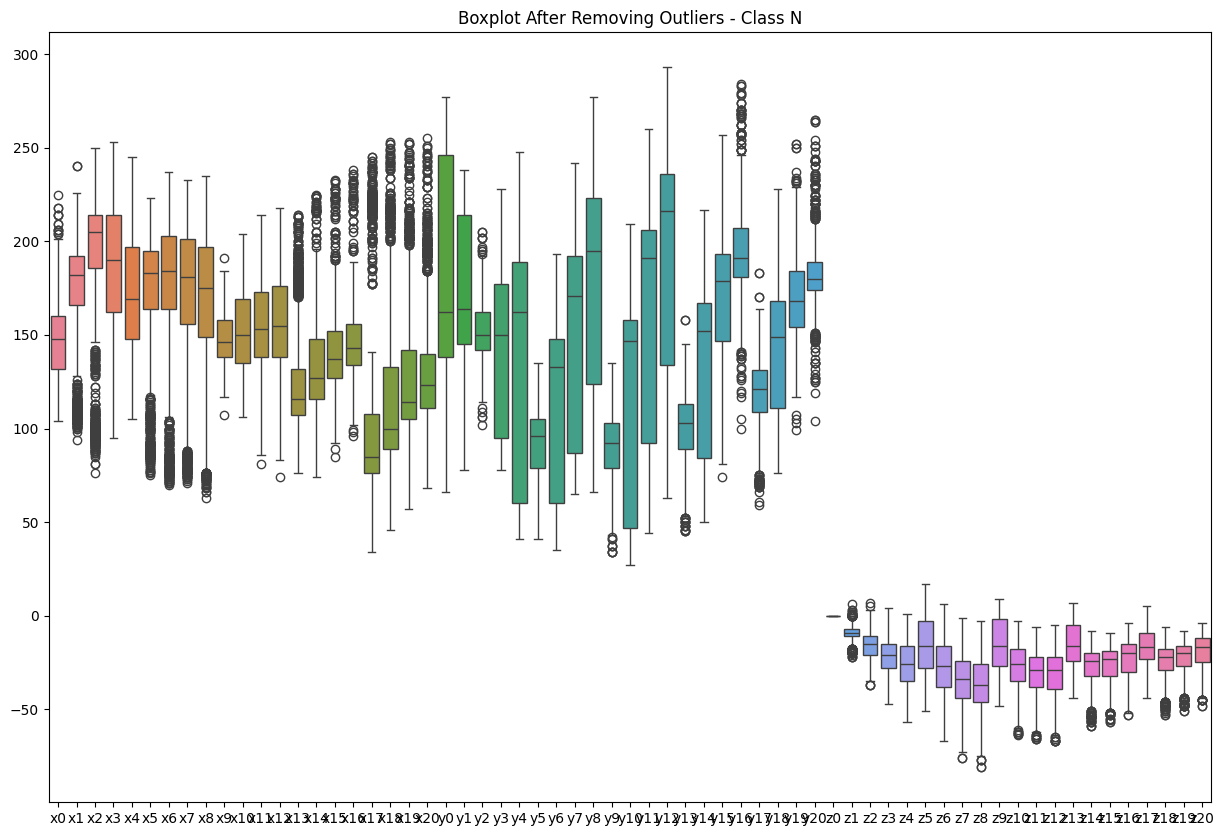

Processing class: R


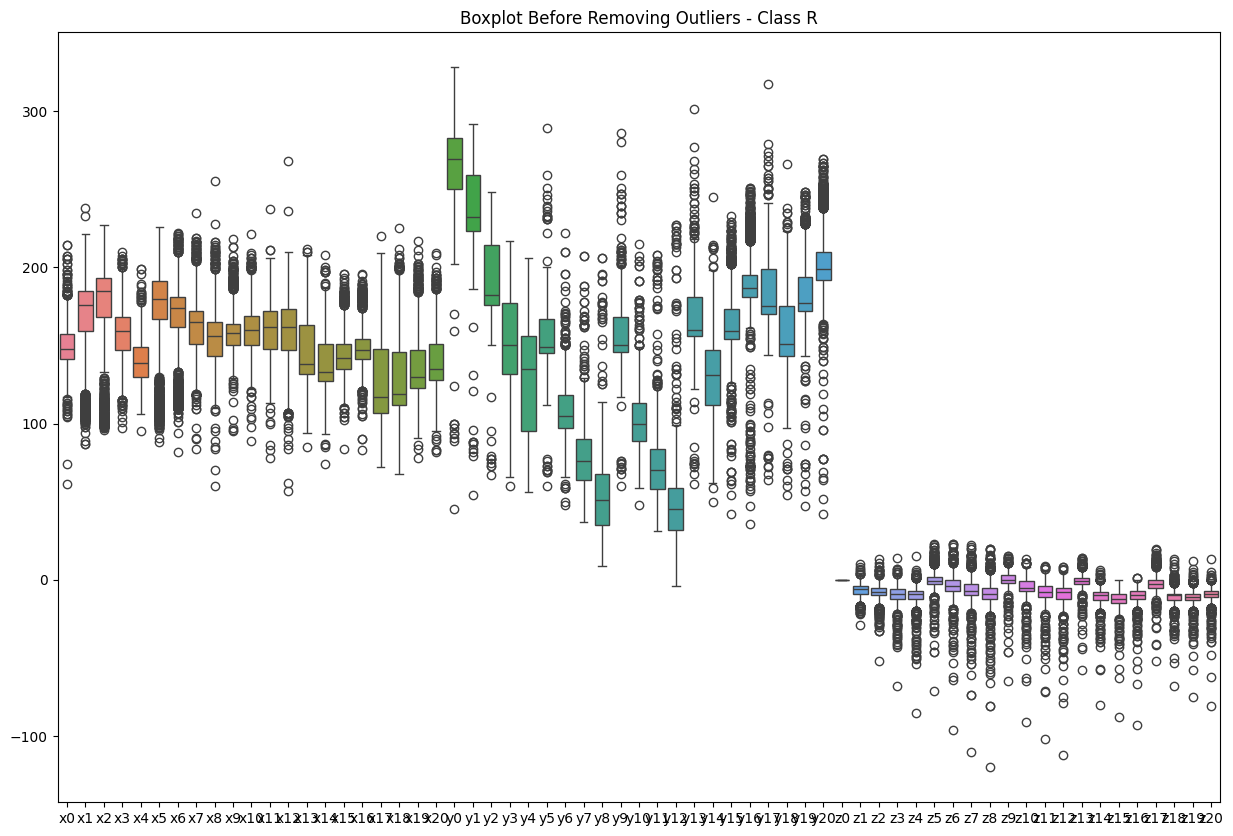

Number of eliment in R : 1585
Number of outliers in R : 317
Number of Non outliers in R : 1268


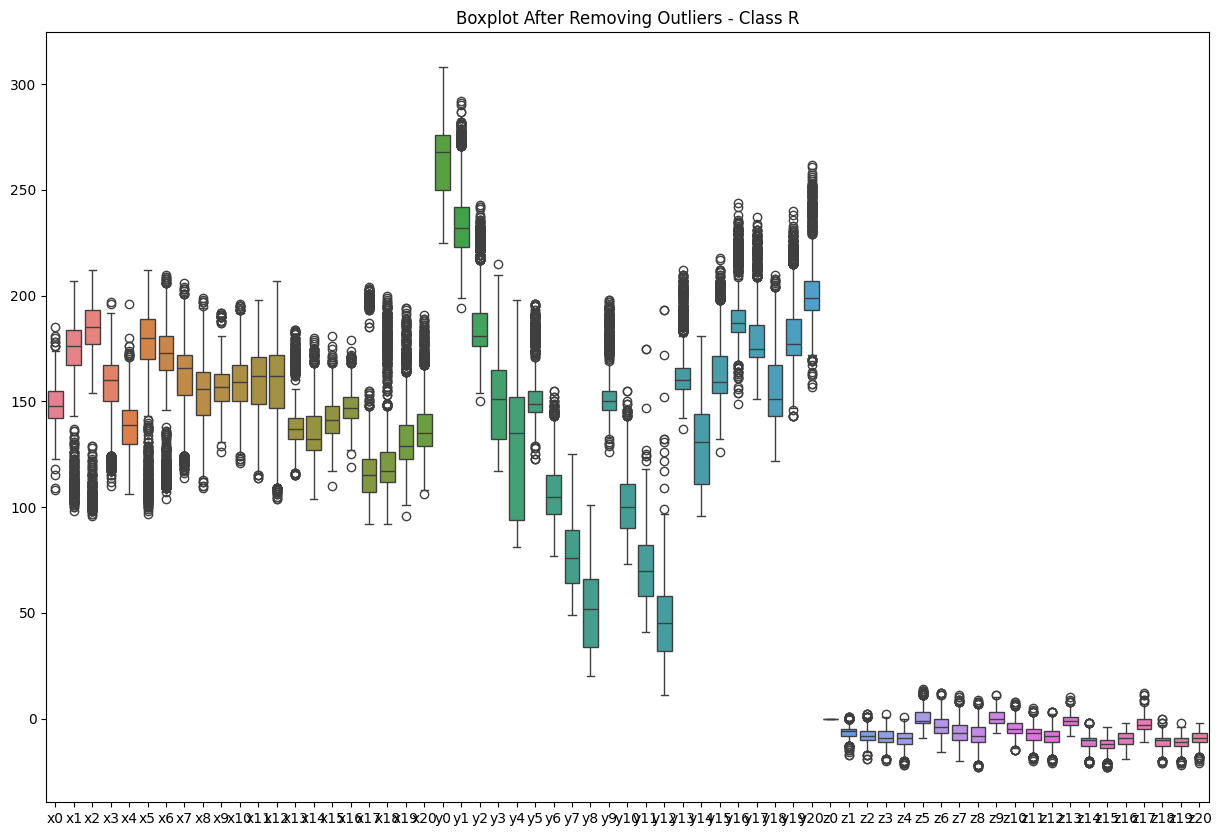

Processing class: SPACE


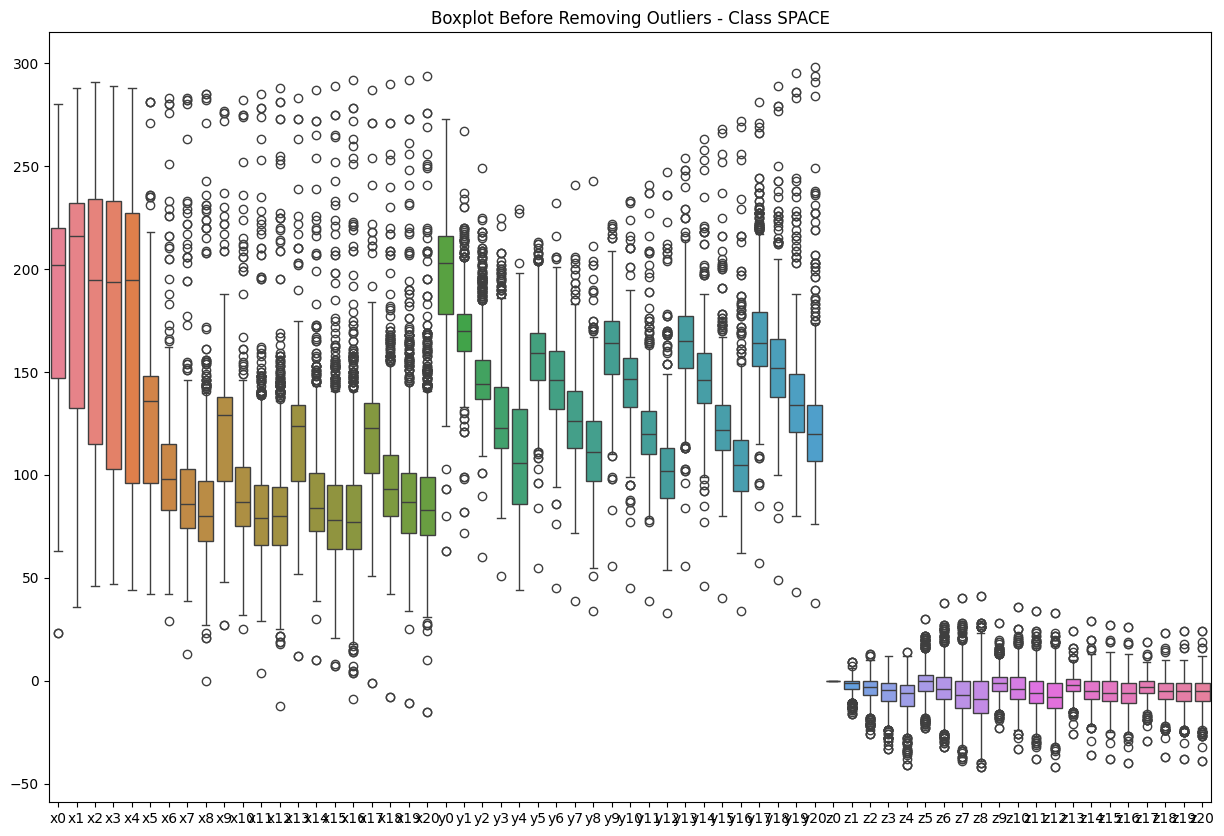

Number of eliment in SPACE : 1002
Number of outliers in SPACE : 201
Number of Non outliers in SPACE : 801


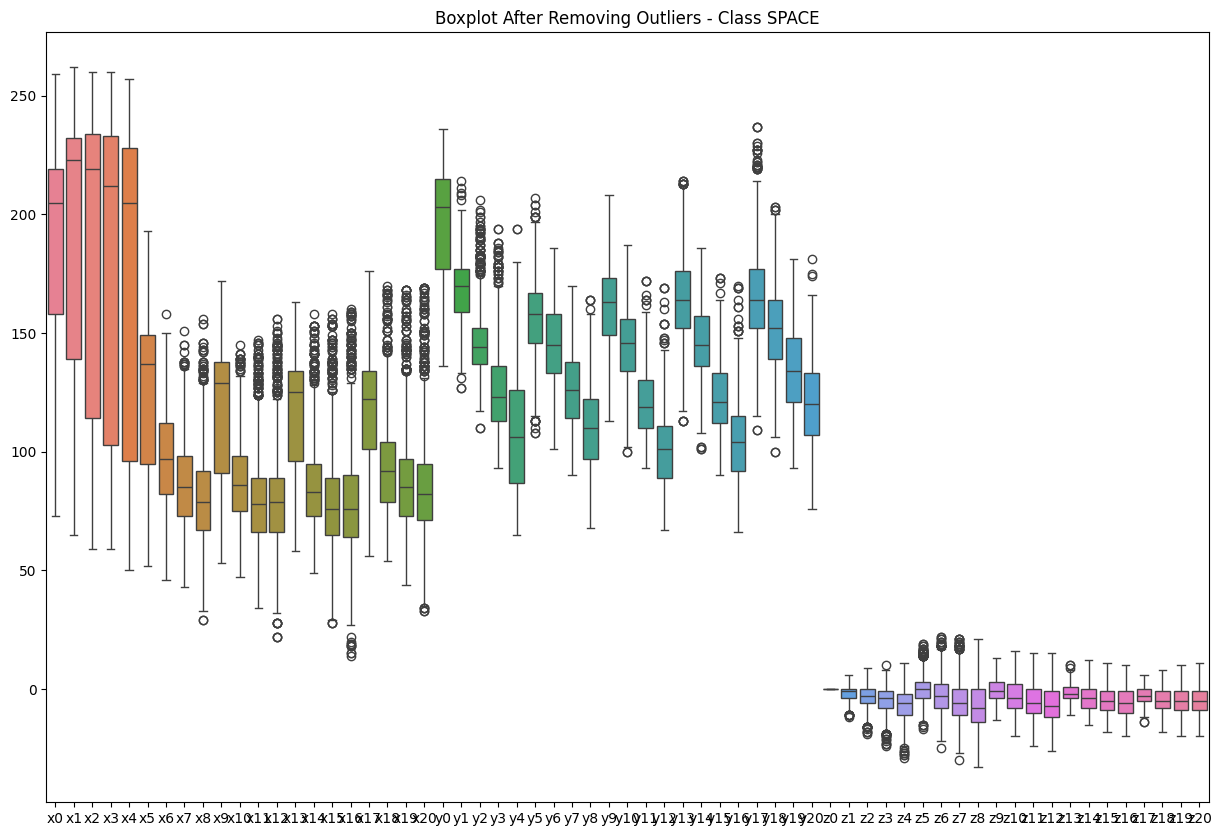

Processing class: B


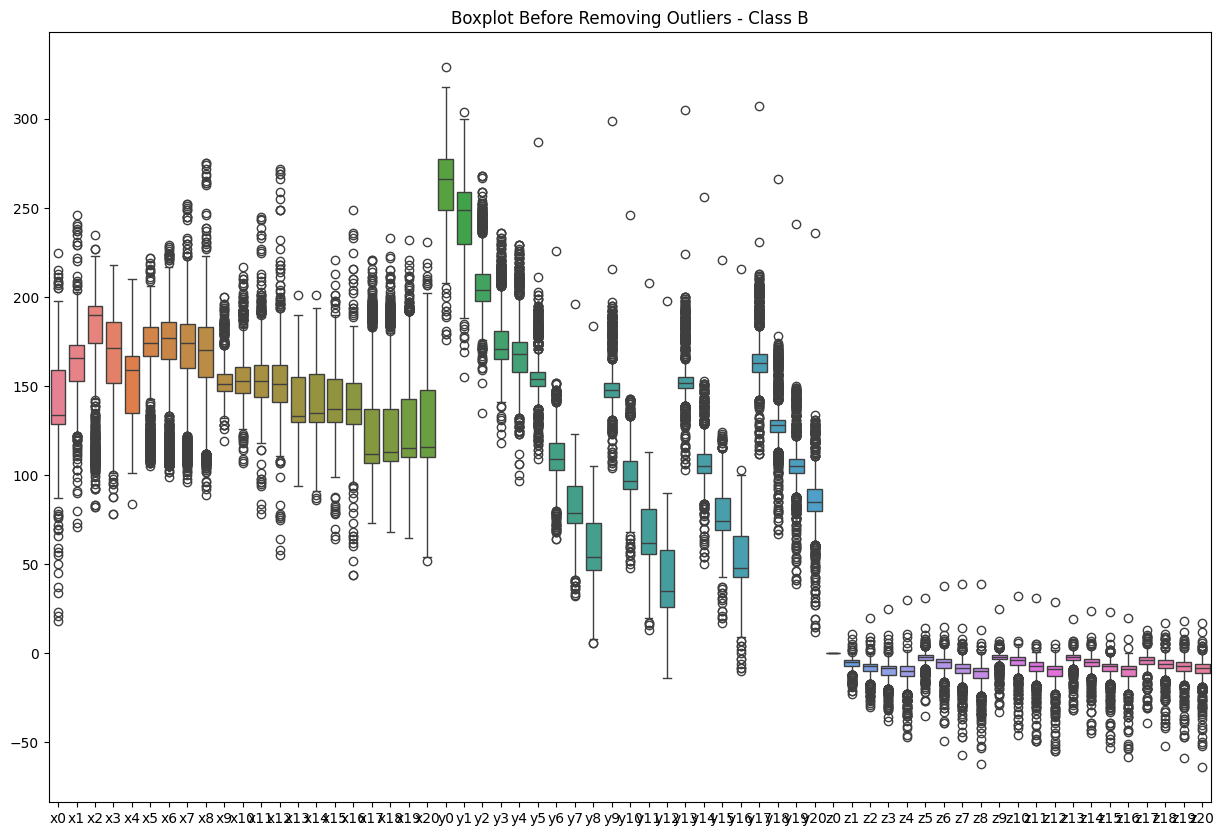

Number of eliment in B : 1582
Number of outliers in B : 316
Number of Non outliers in B : 1266


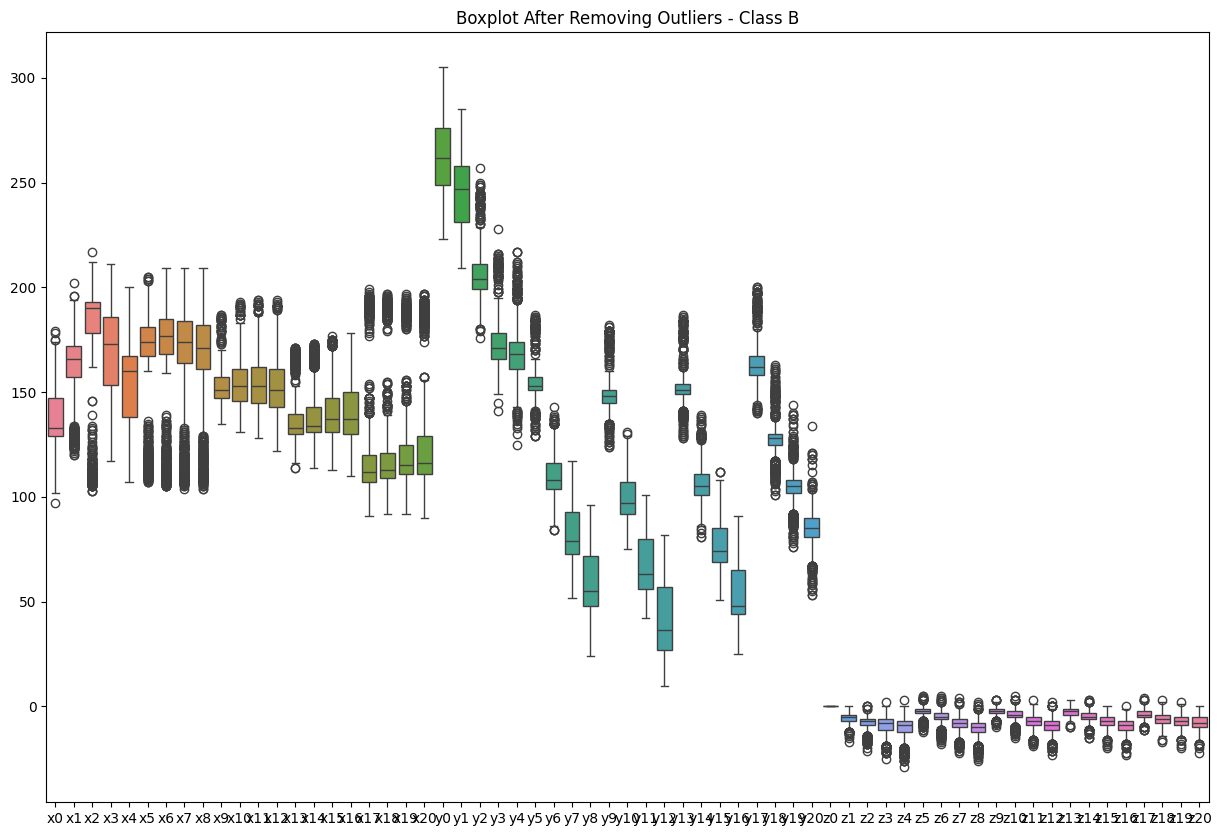

Processing class: I


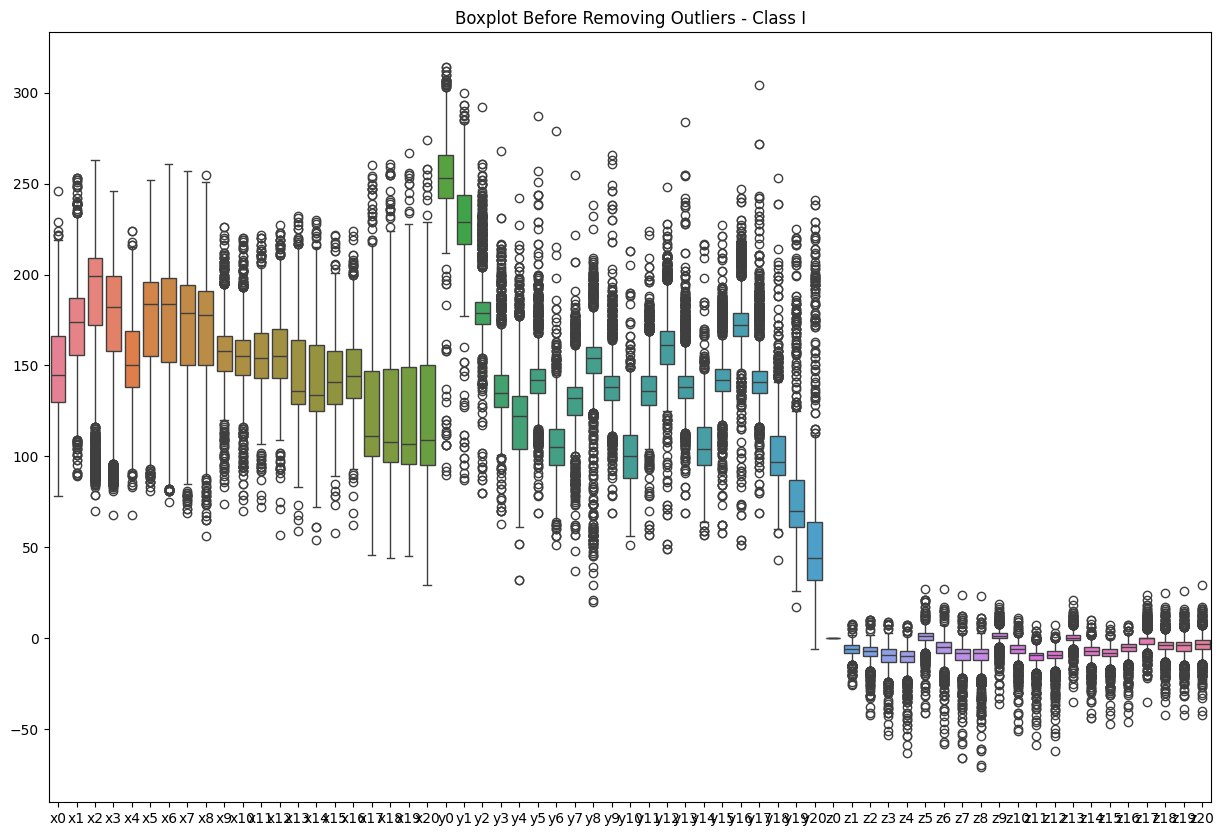

Number of eliment in I : 1569
Number of outliers in I : 314
Number of Non outliers in I : 1255


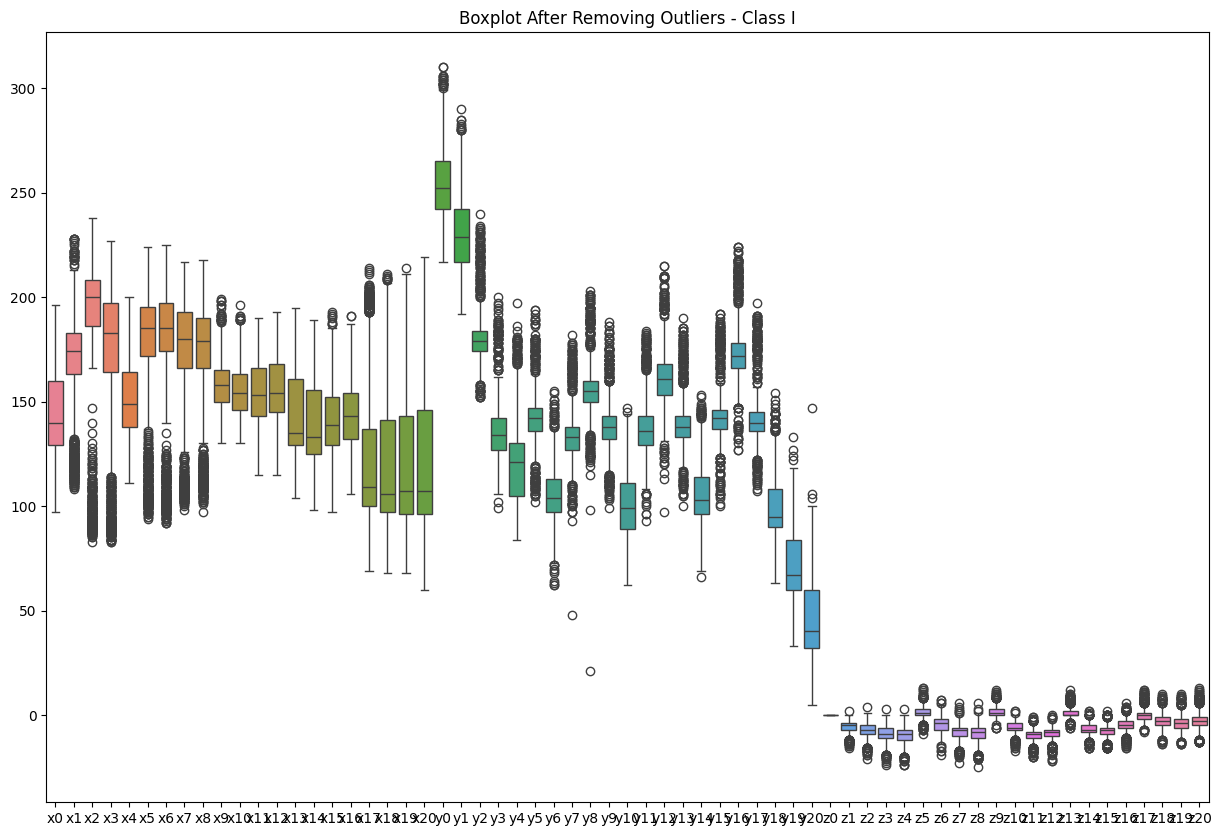

Processing class: DEL


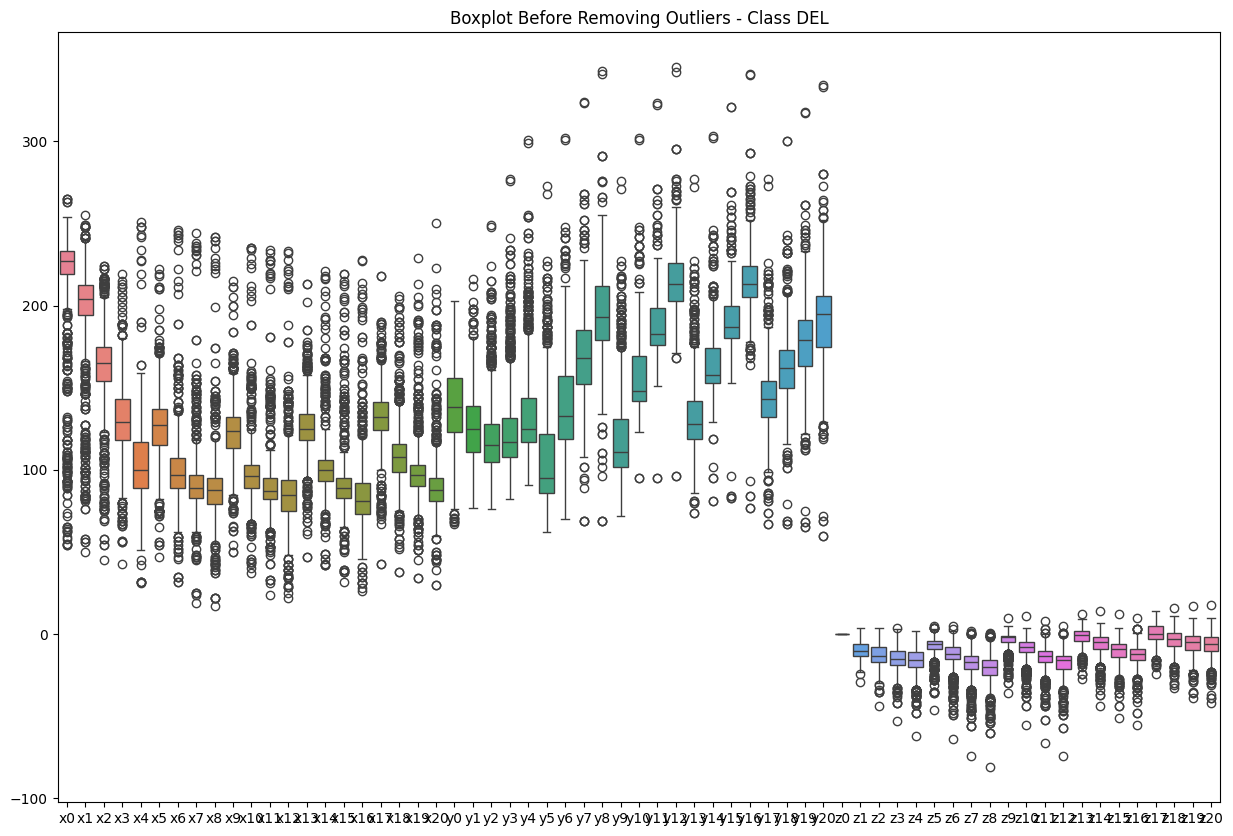

Number of eliment in DEL : 1002
Number of outliers in DEL : 201
Number of Non outliers in DEL : 801


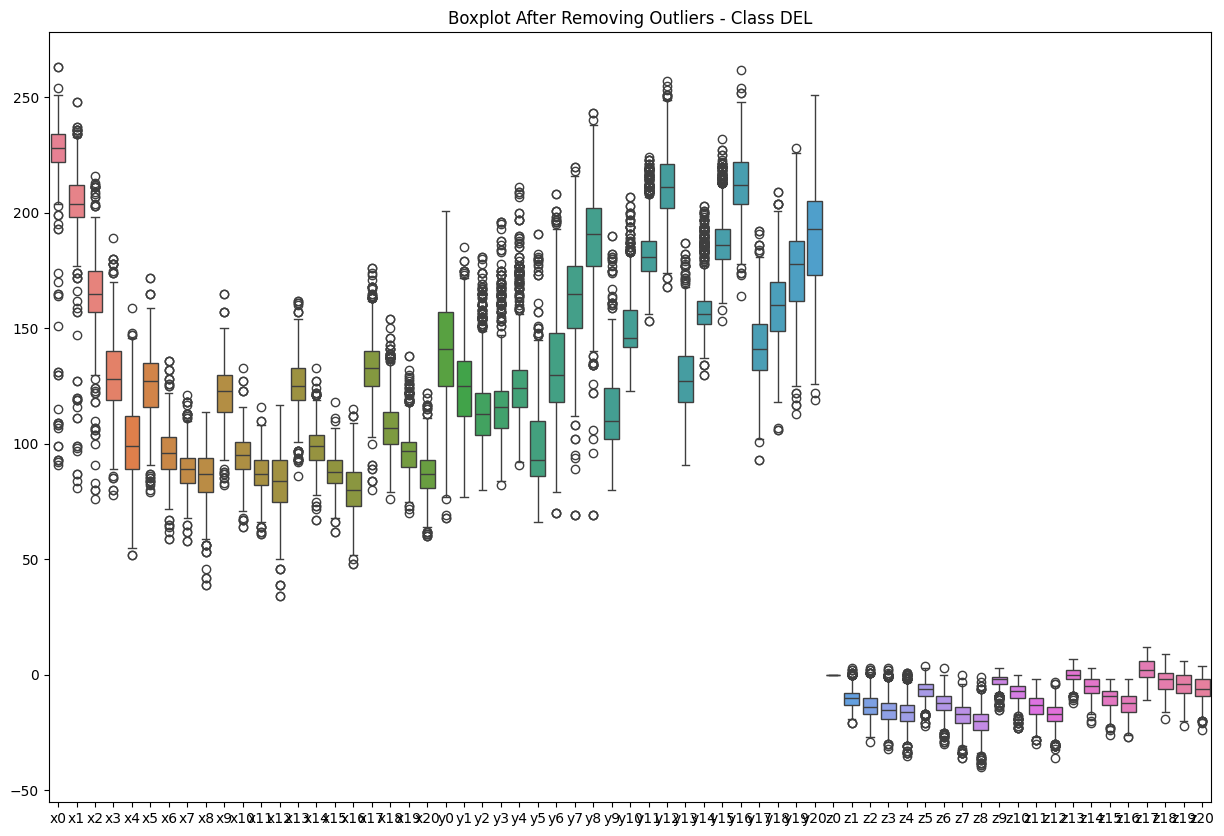

Processing class: F


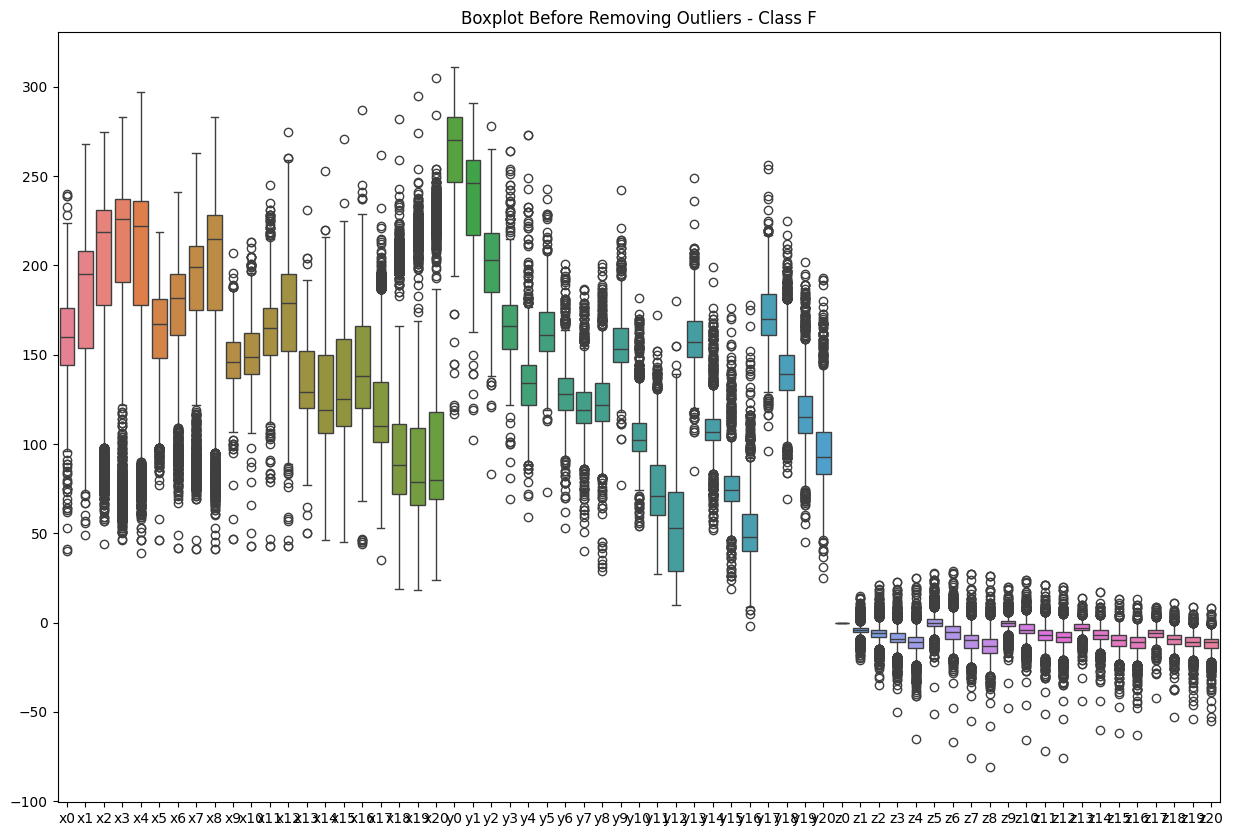

Number of eliment in F : 1589
Number of outliers in F : 318
Number of Non outliers in F : 1271


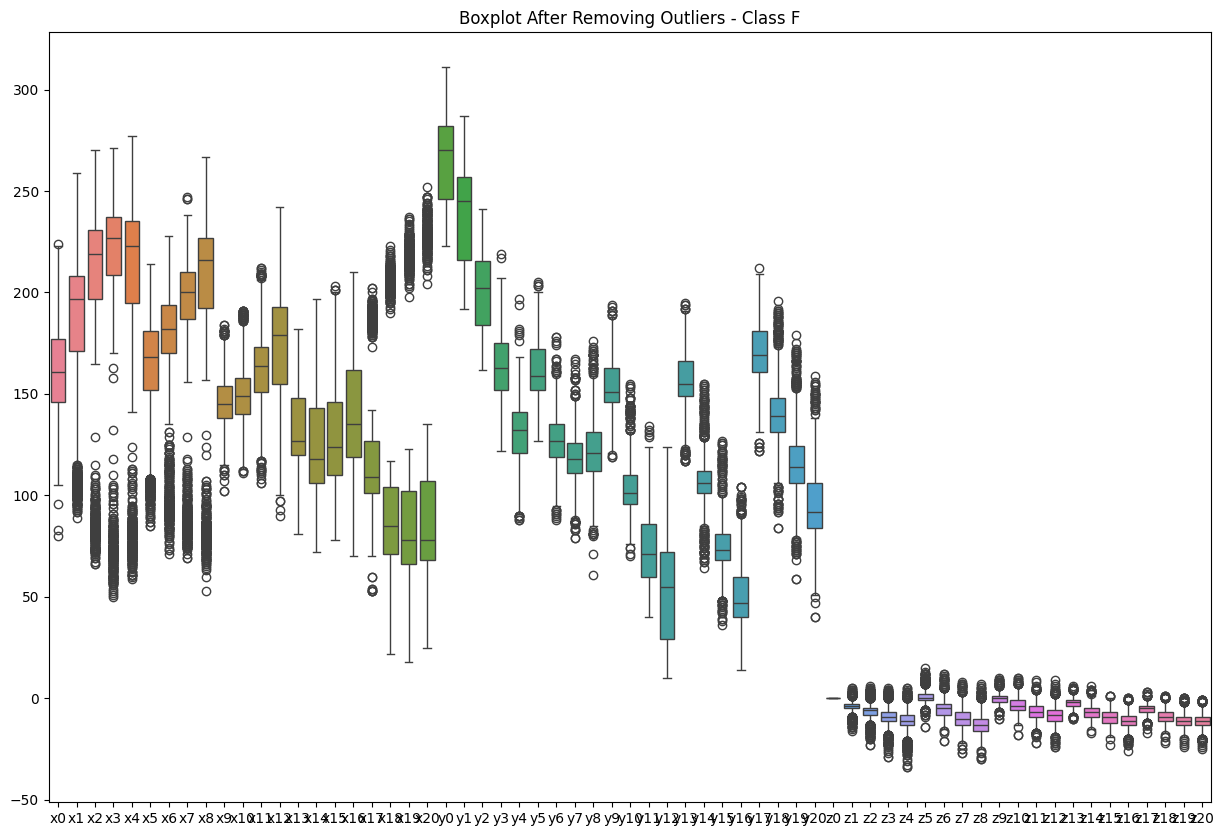

Processing class: H


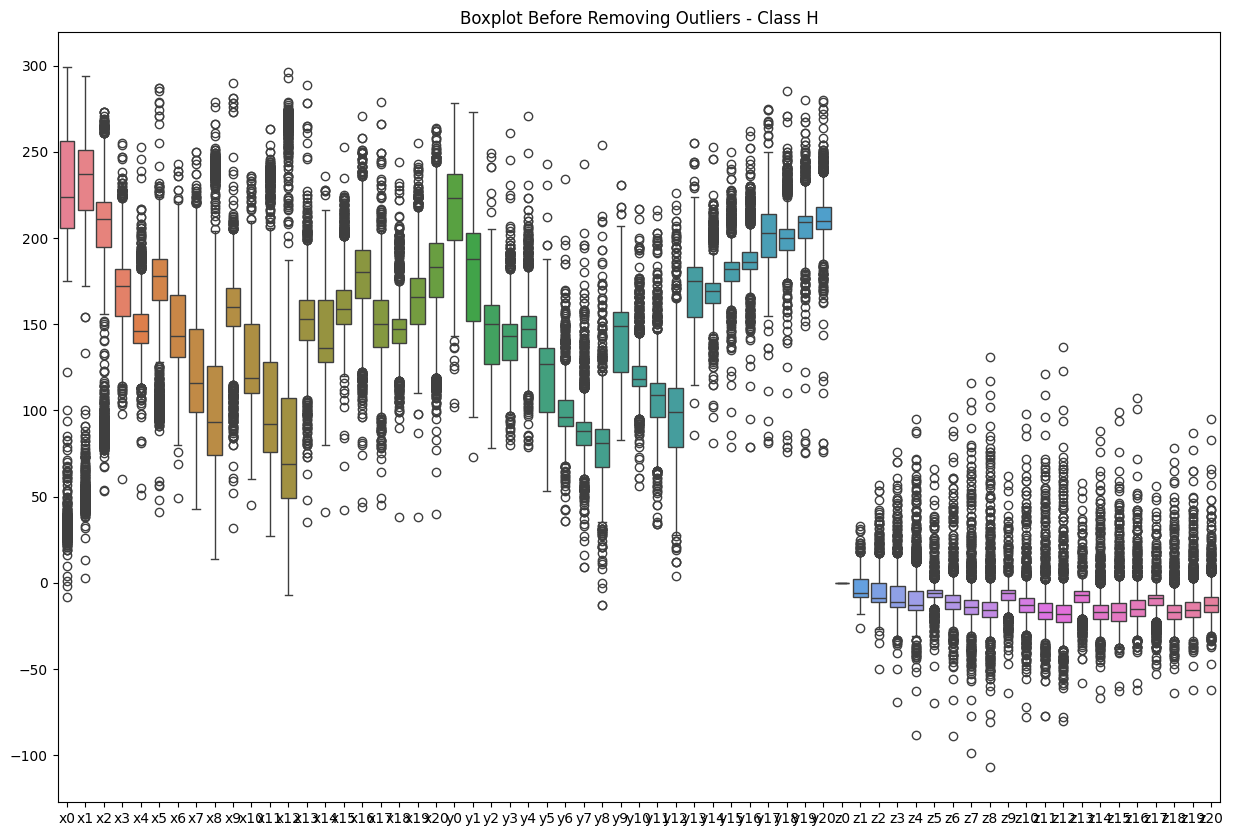

Number of eliment in H : 1593
Number of outliers in H : 319
Number of Non outliers in H : 1274


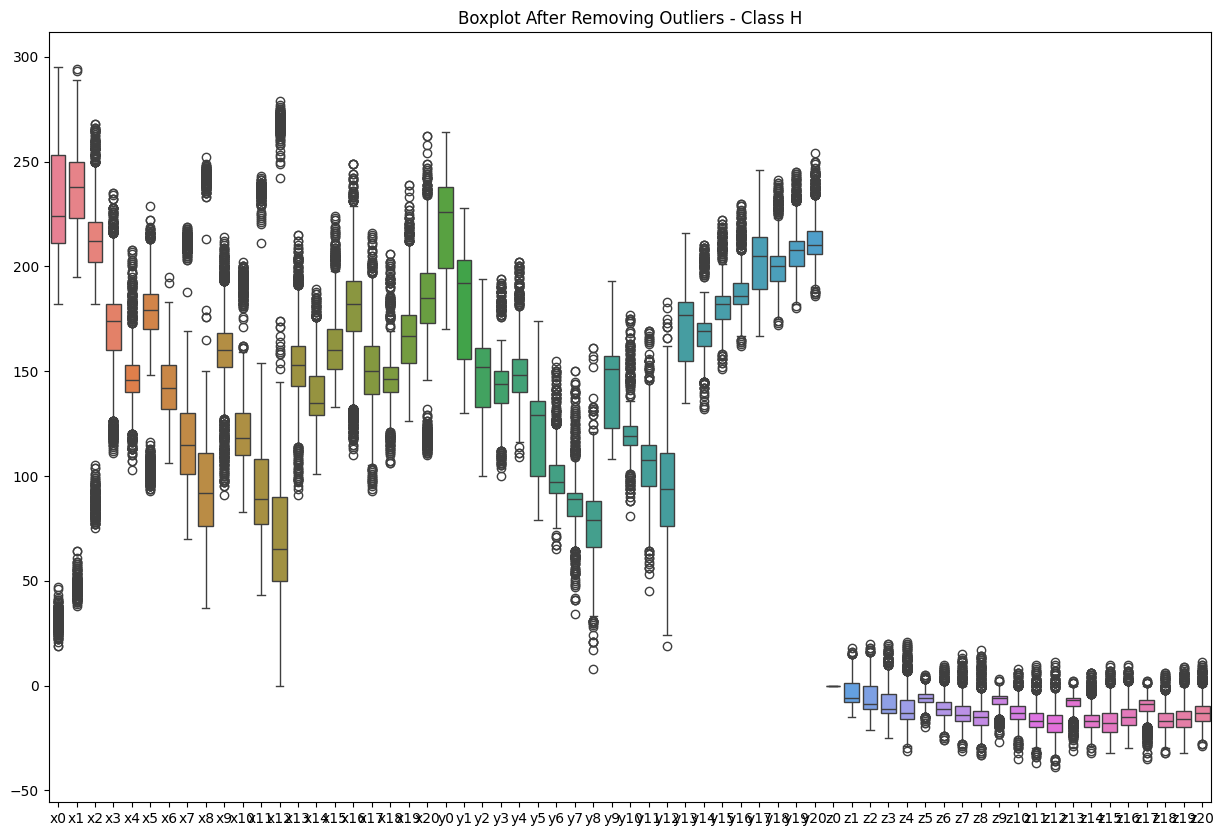

Processing class: E


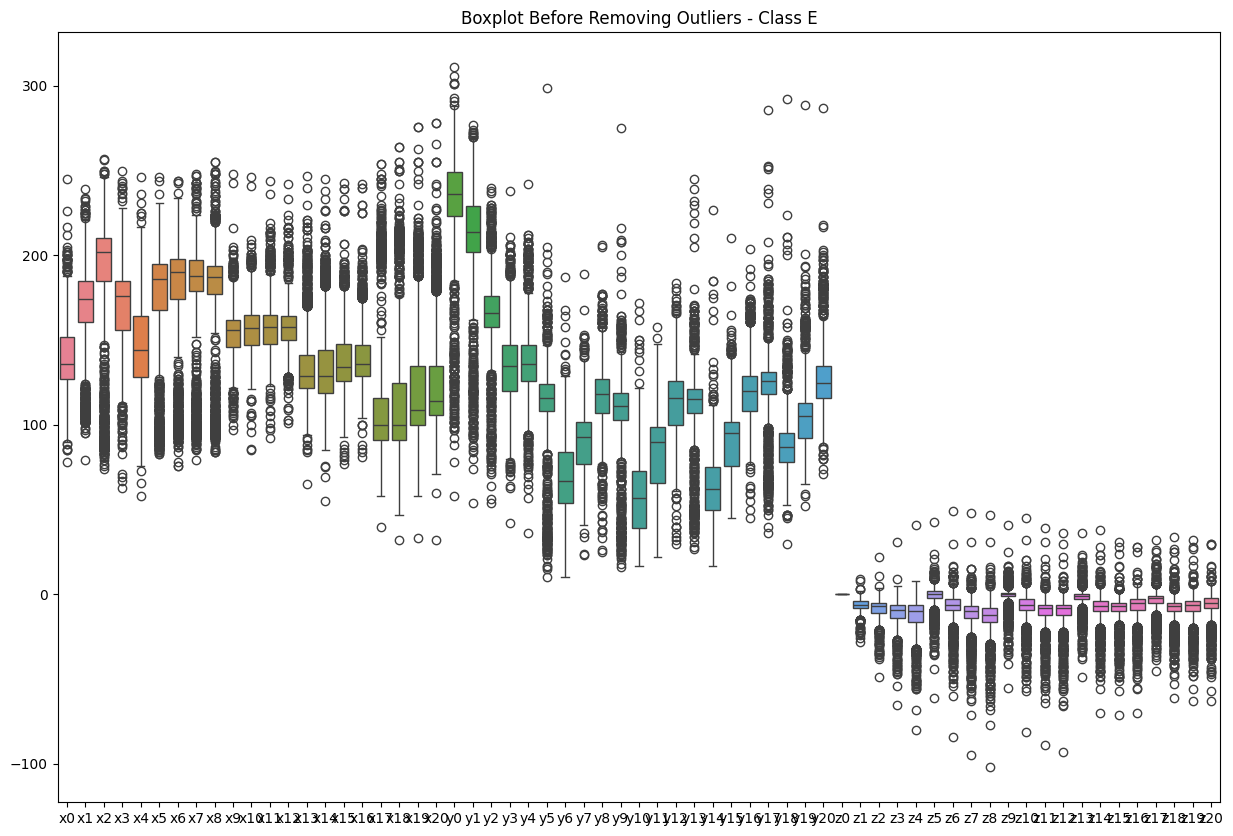

Number of eliment in E : 1561
Number of outliers in E : 311
Number of Non outliers in E : 1250


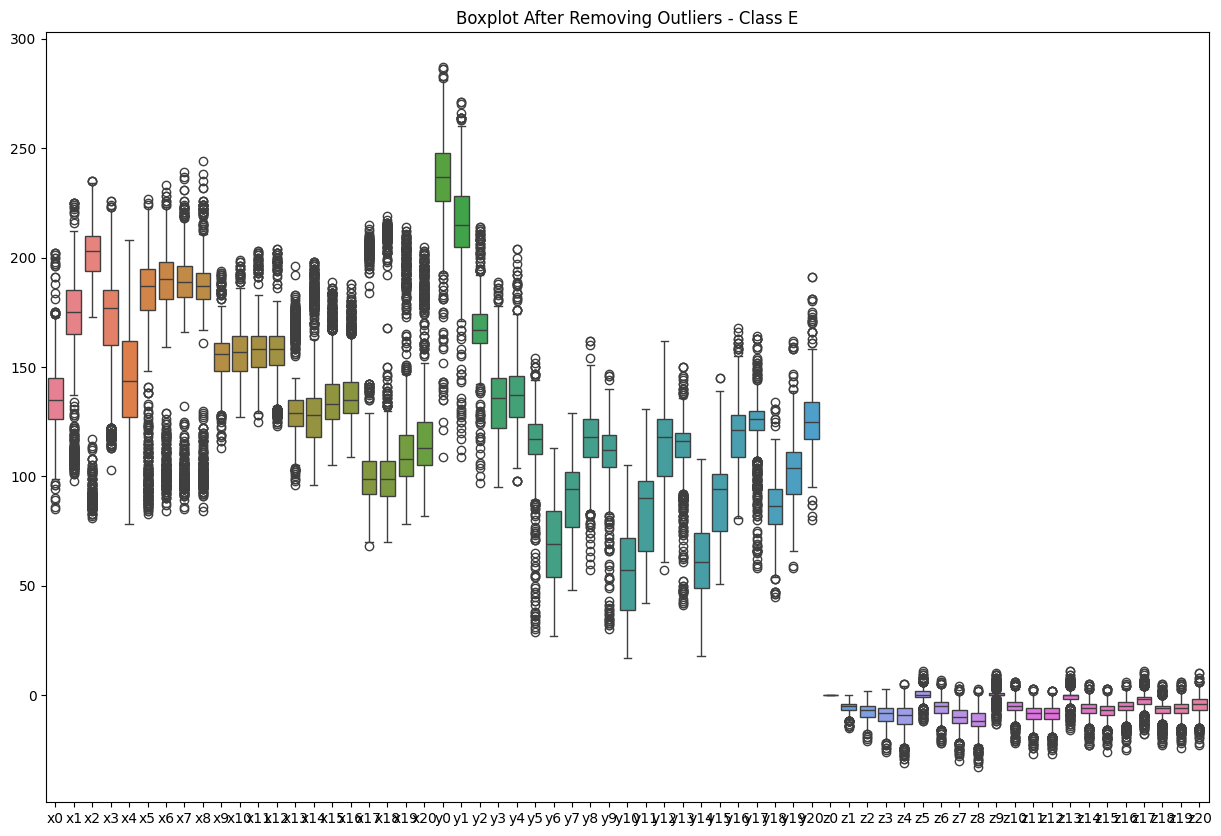

Processing class: U


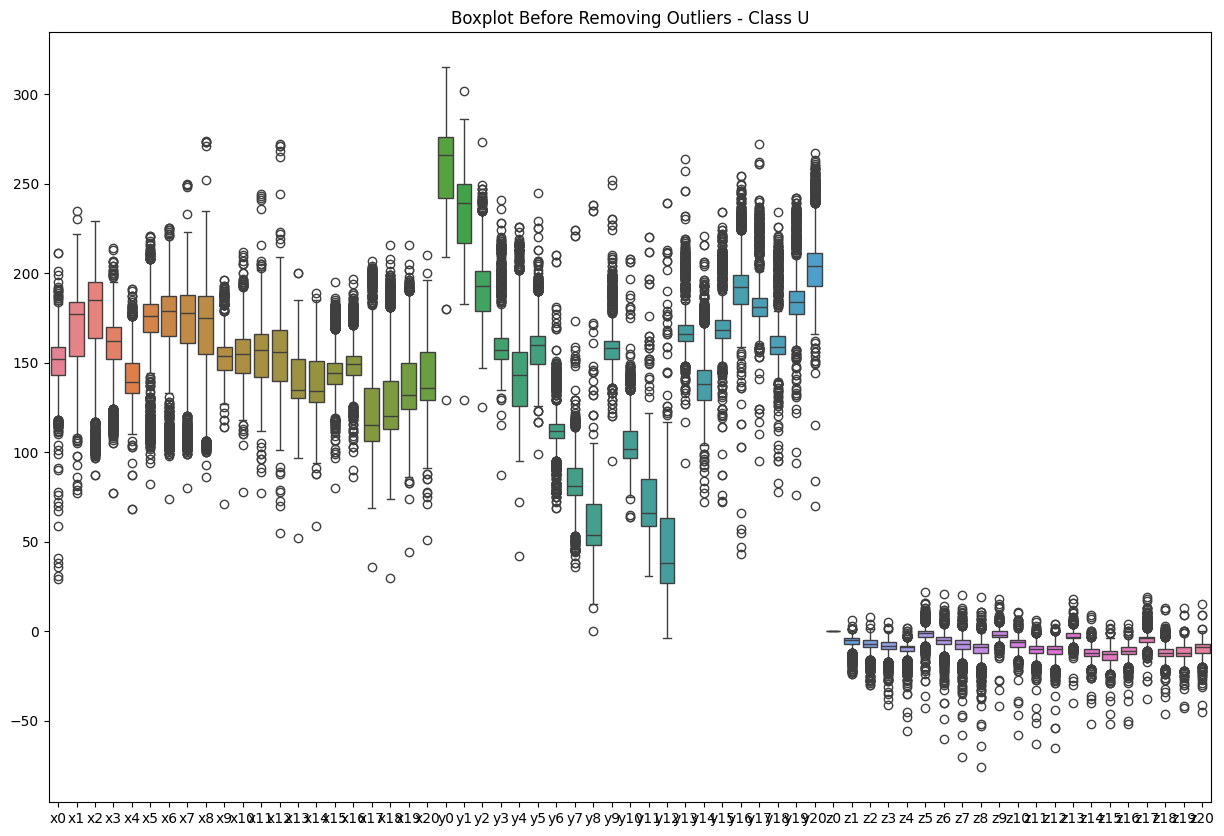

Number of eliment in U : 1577
Number of outliers in U : 316
Number of Non outliers in U : 1261


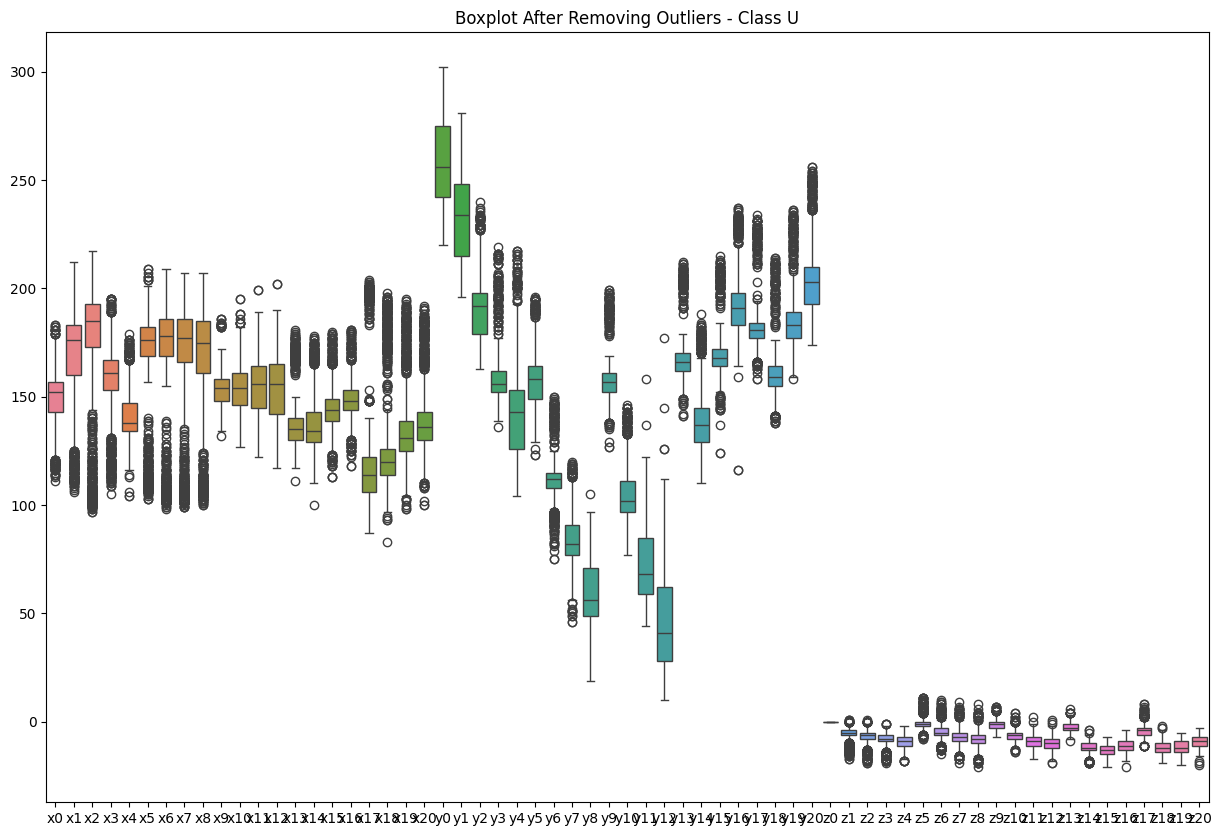

Processing class: M


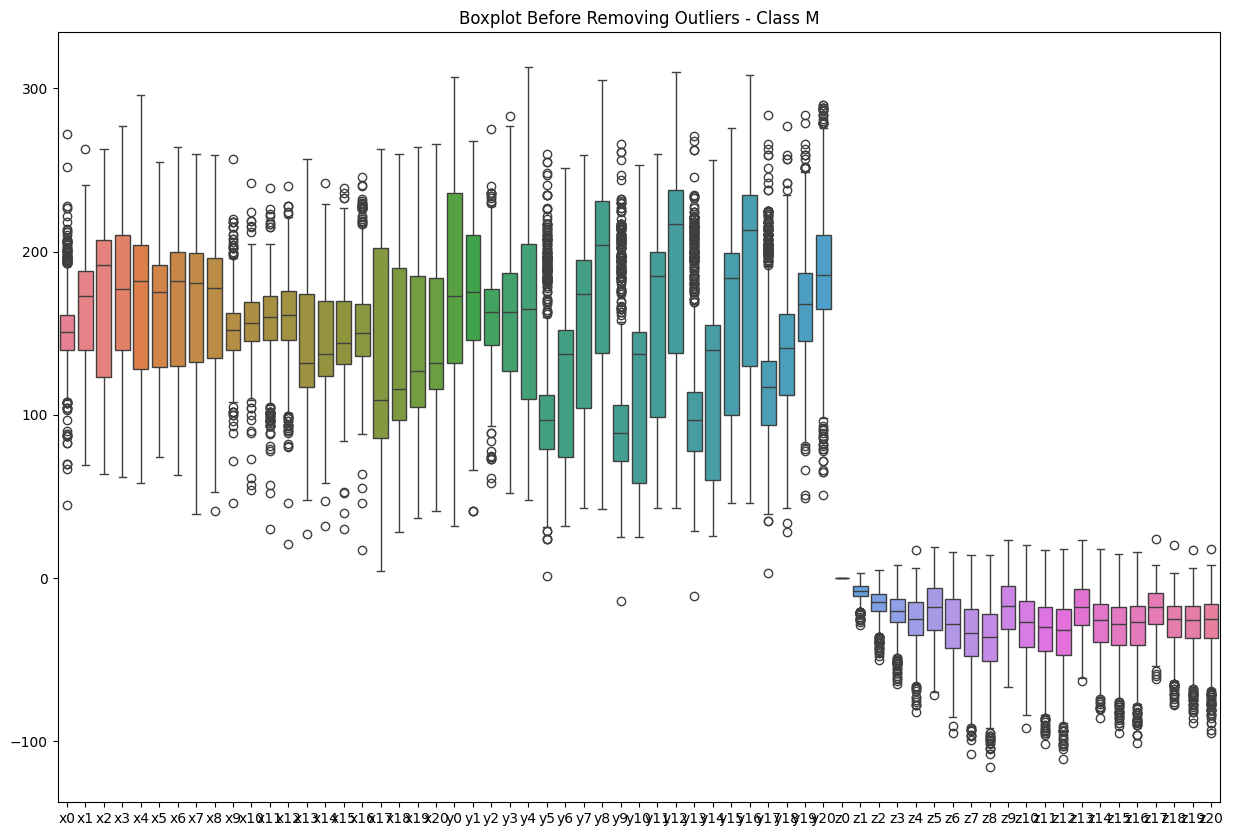

Number of eliment in M : 1323
Number of outliers in M : 264
Number of Non outliers in M : 1059


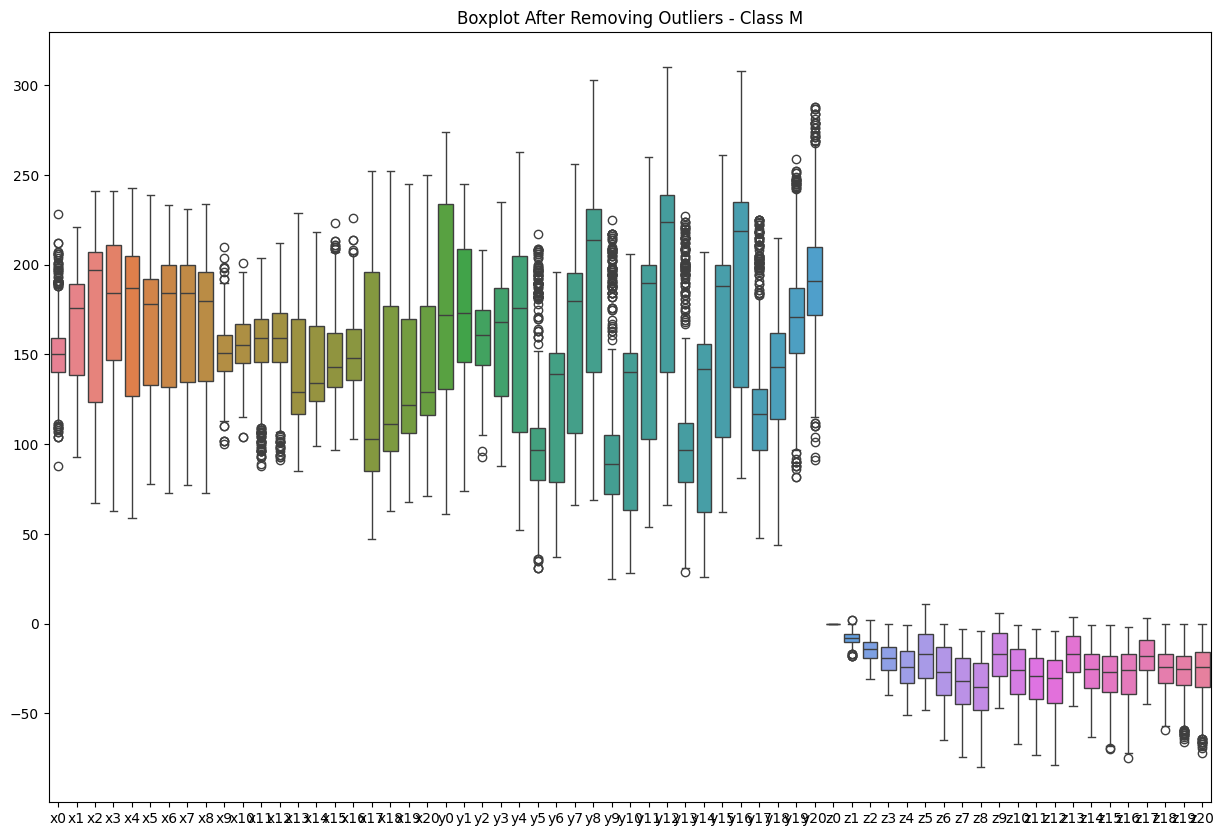

Processing class: X


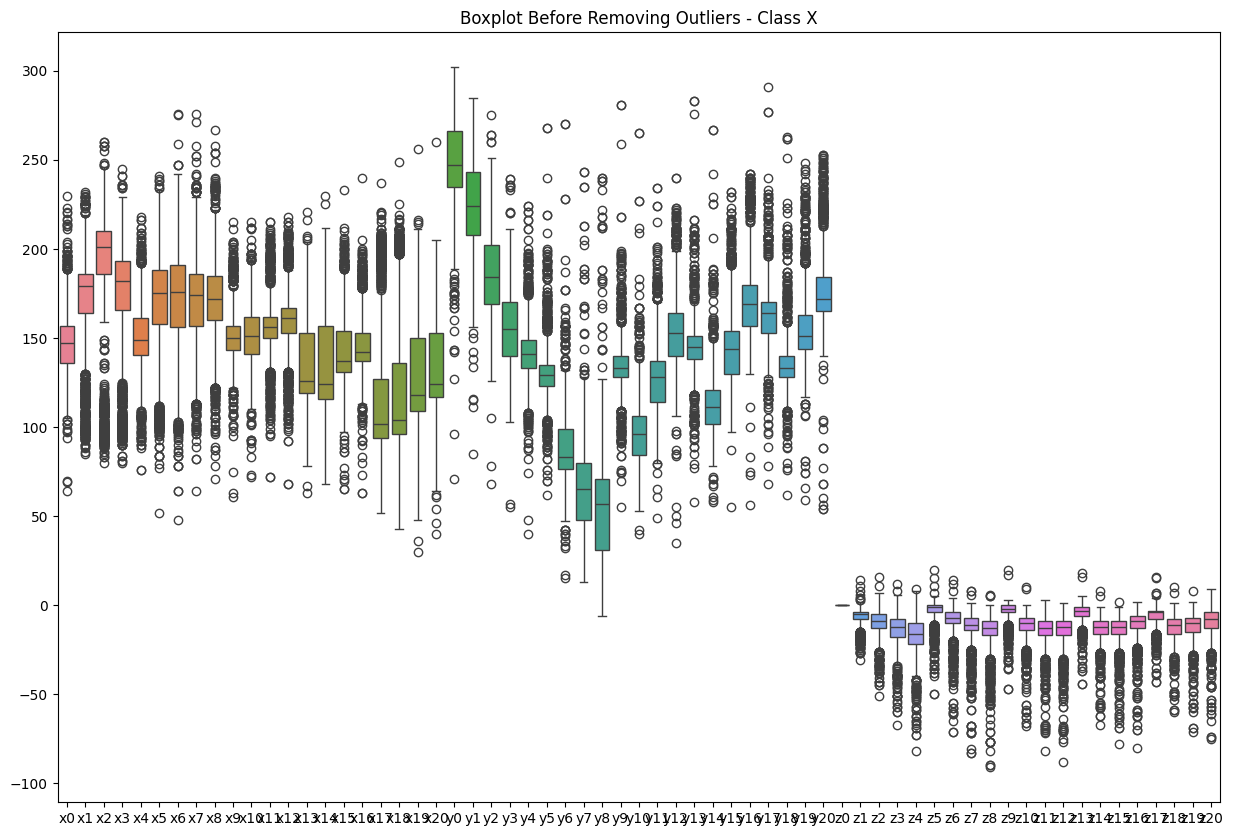

Number of eliment in X : 1567
Number of outliers in X : 314
Number of Non outliers in X : 1253


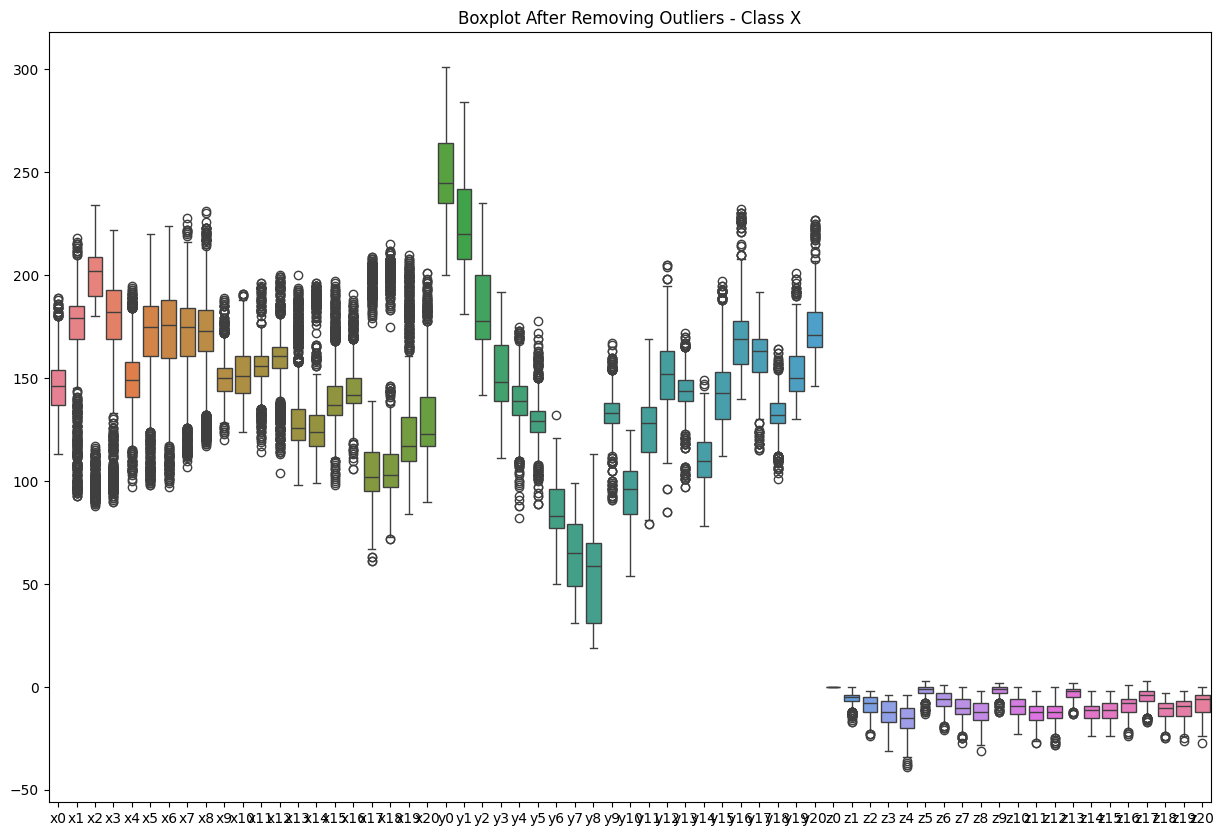

Processing class: K


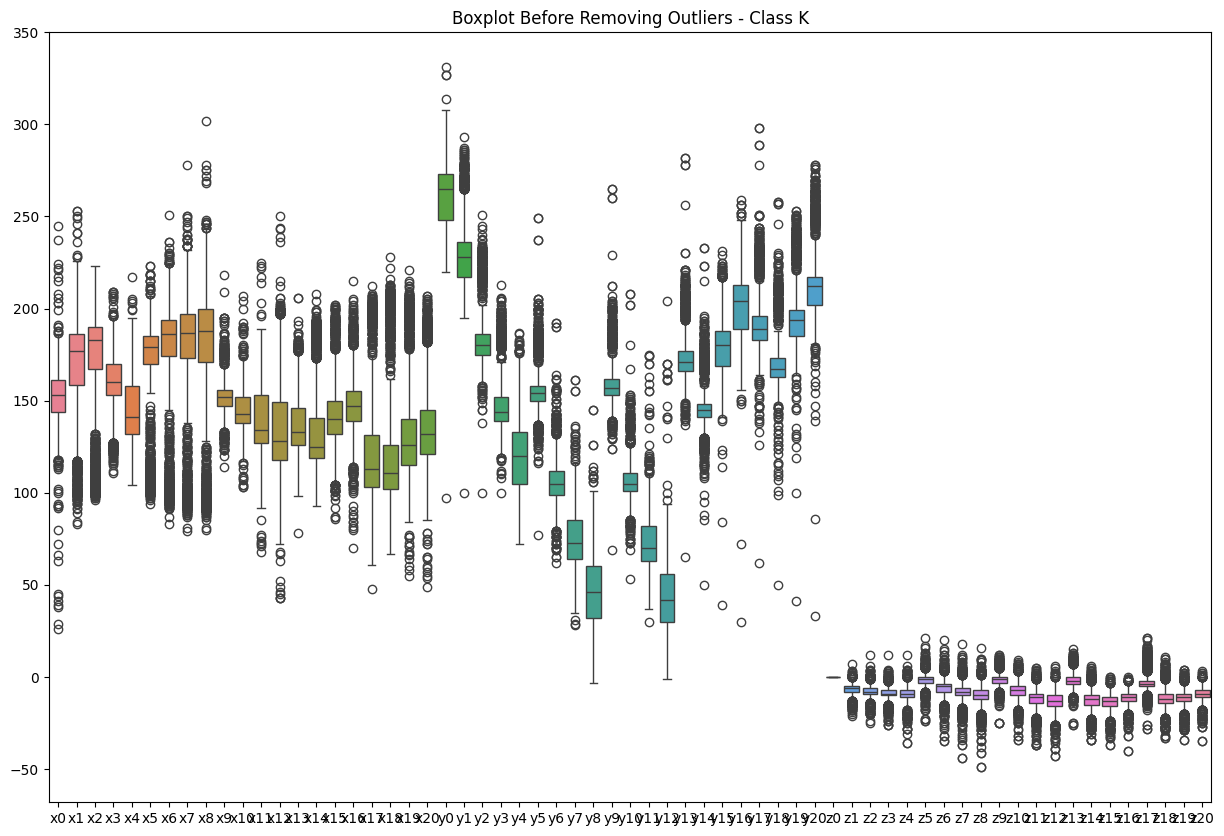

Number of eliment in K : 1591
Number of outliers in K : 318
Number of Non outliers in K : 1273


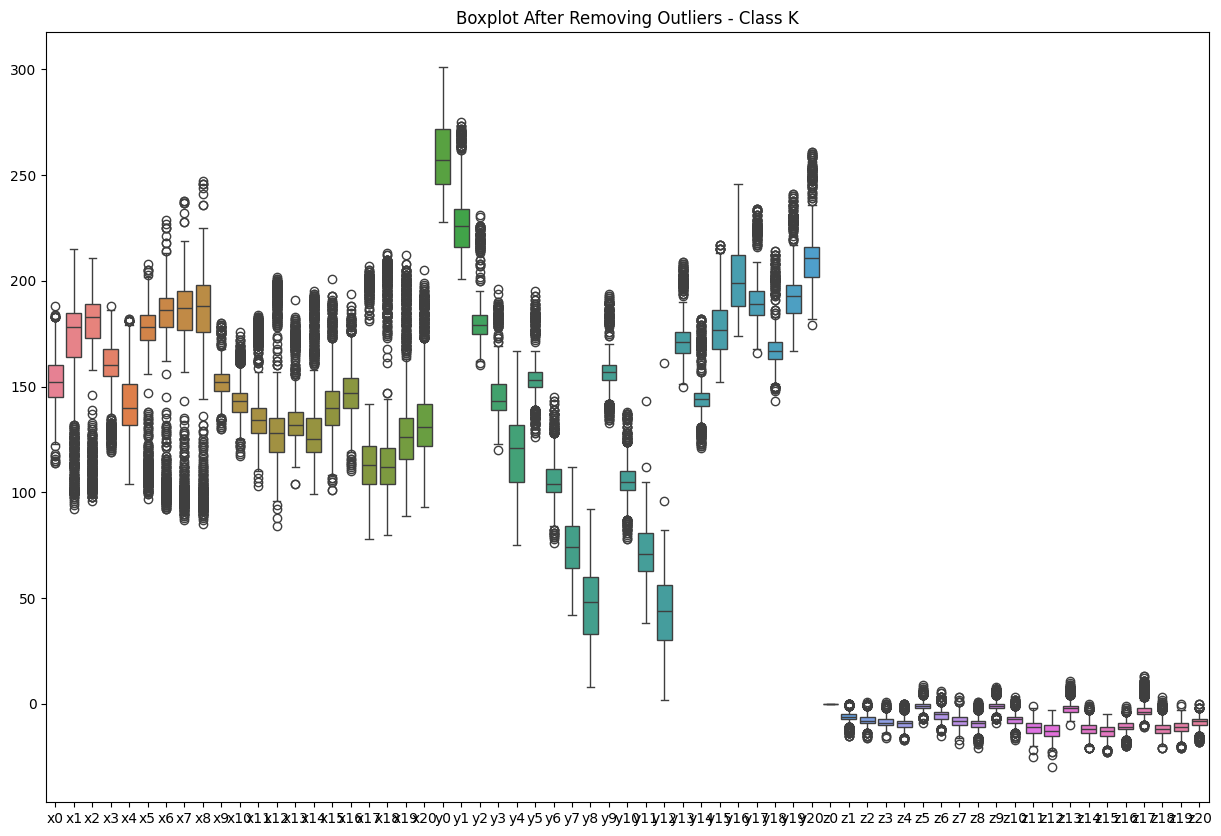

Processing class: Q


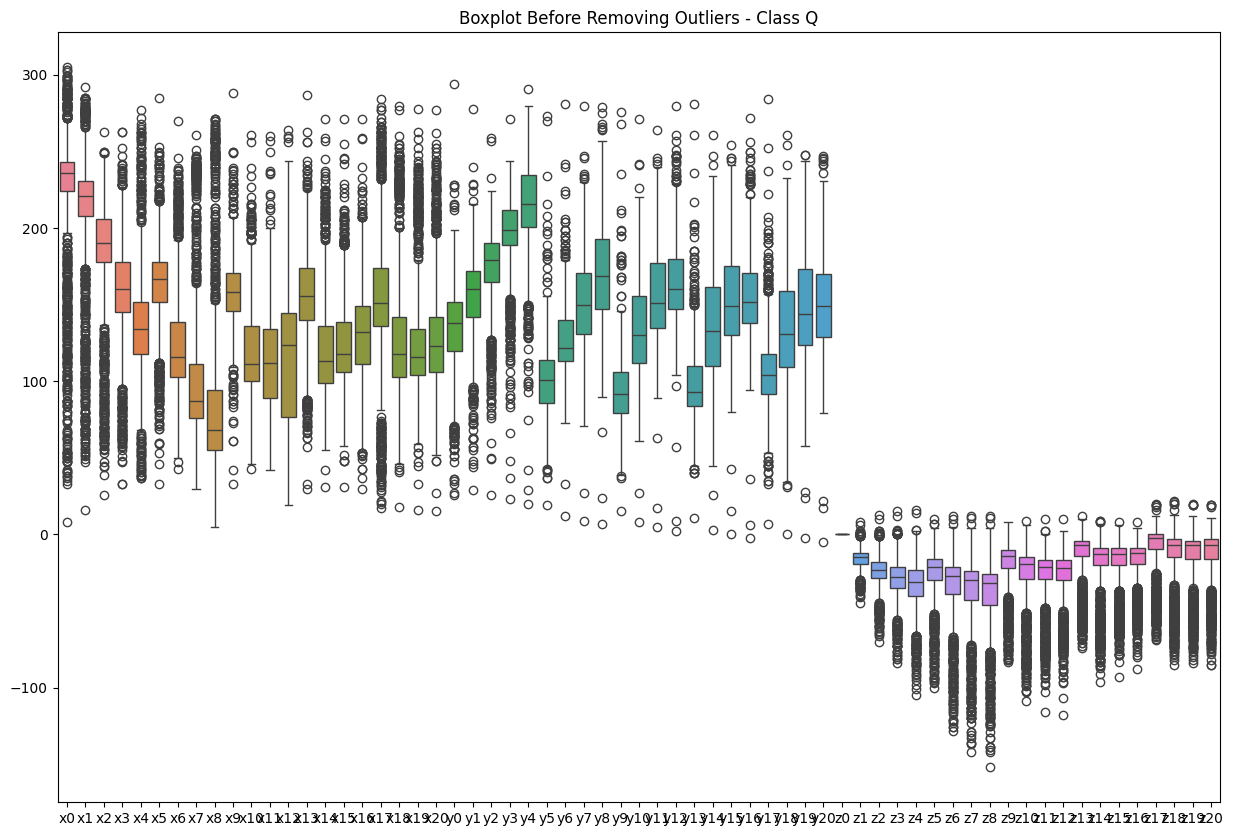

Number of eliment in Q : 1318
Number of outliers in Q : 264
Number of Non outliers in Q : 1054


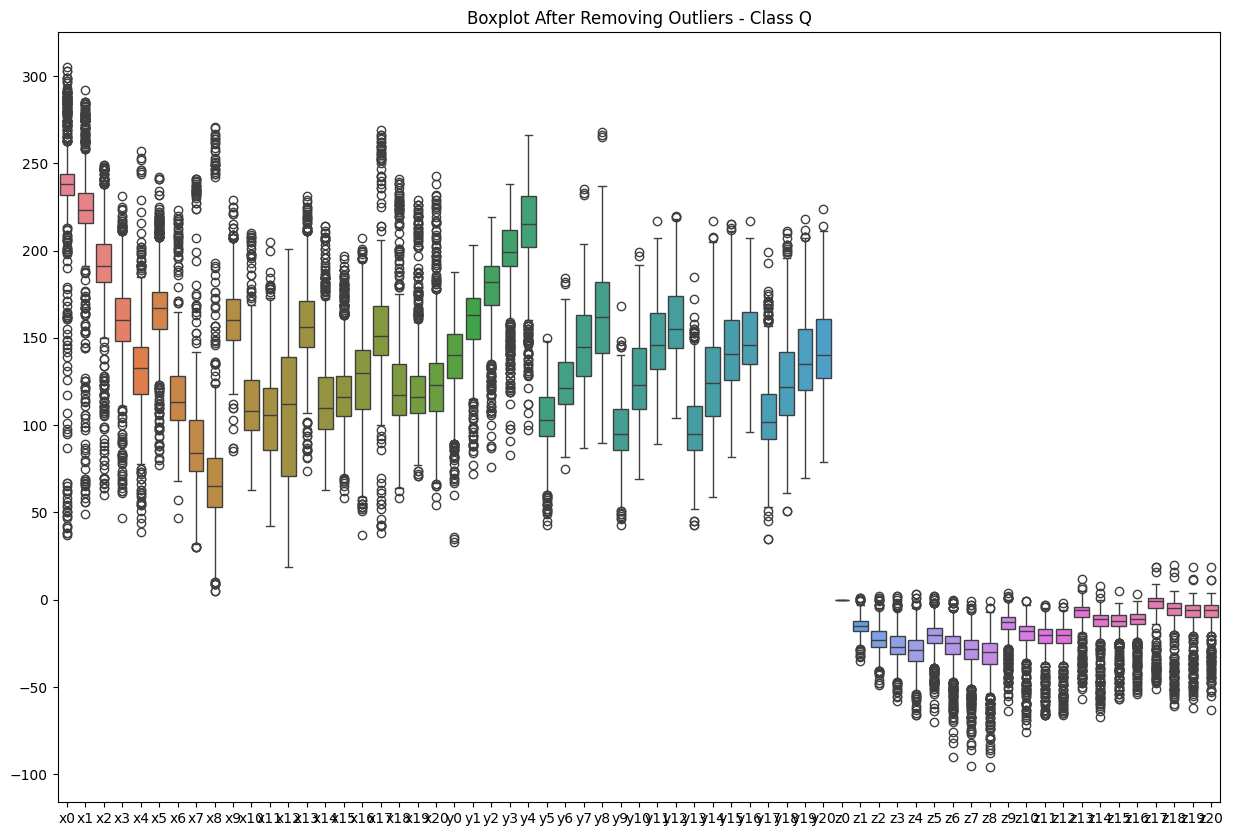

Processing class: Y


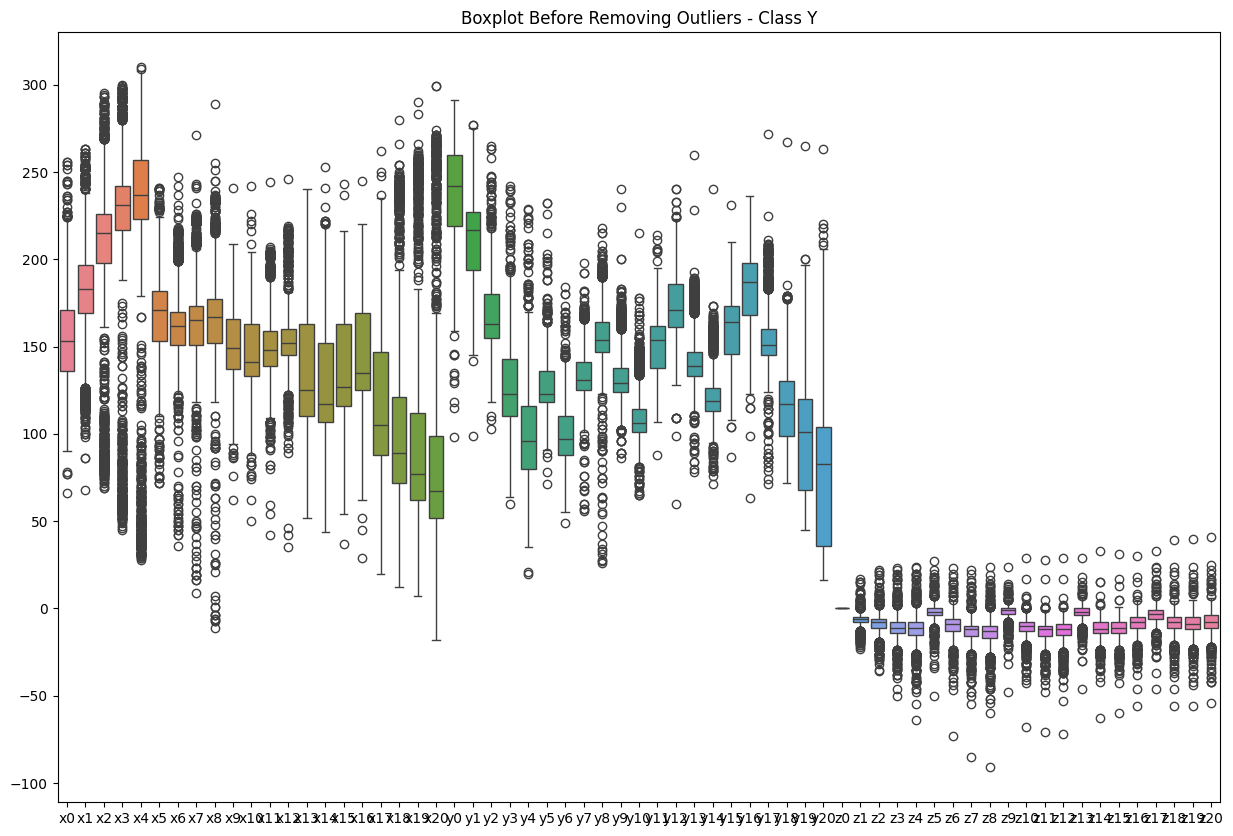

Number of eliment in Y : 1473
Number of outliers in Y : 295
Number of Non outliers in Y : 1178


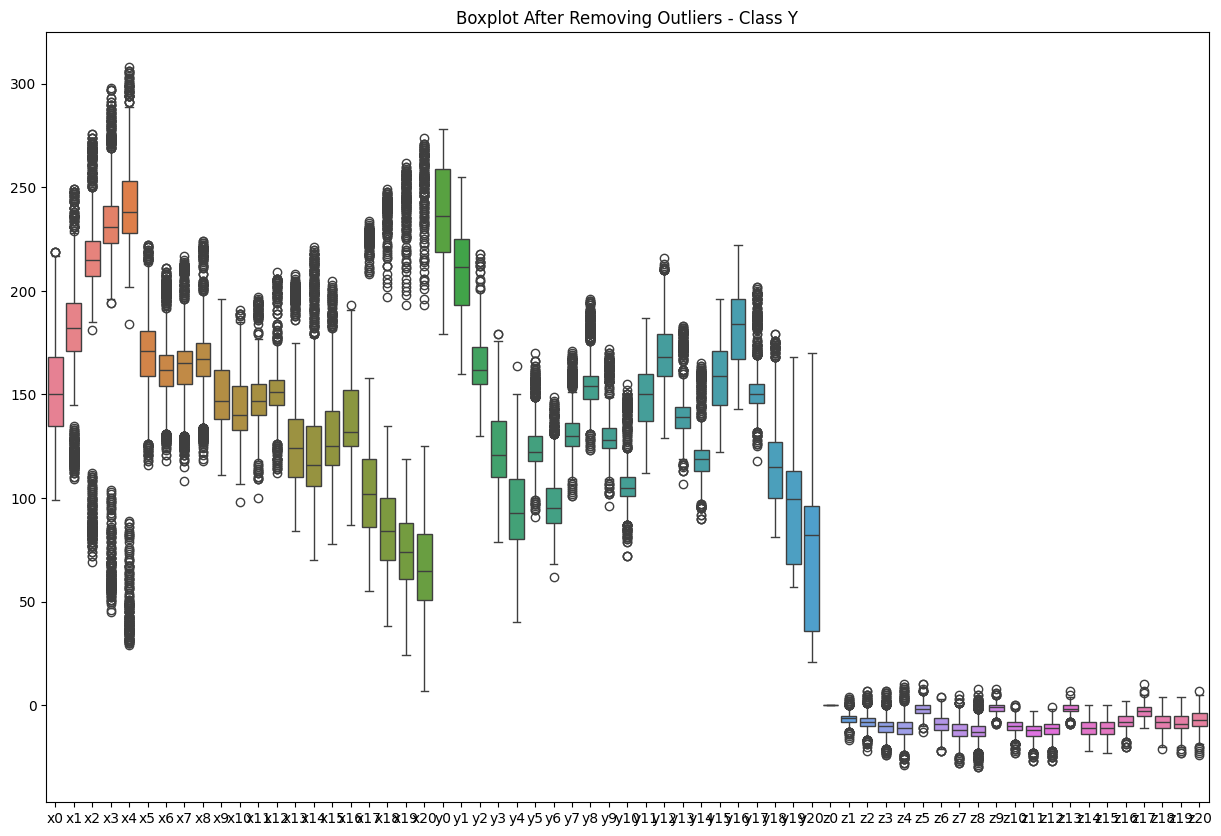

Processing class: S


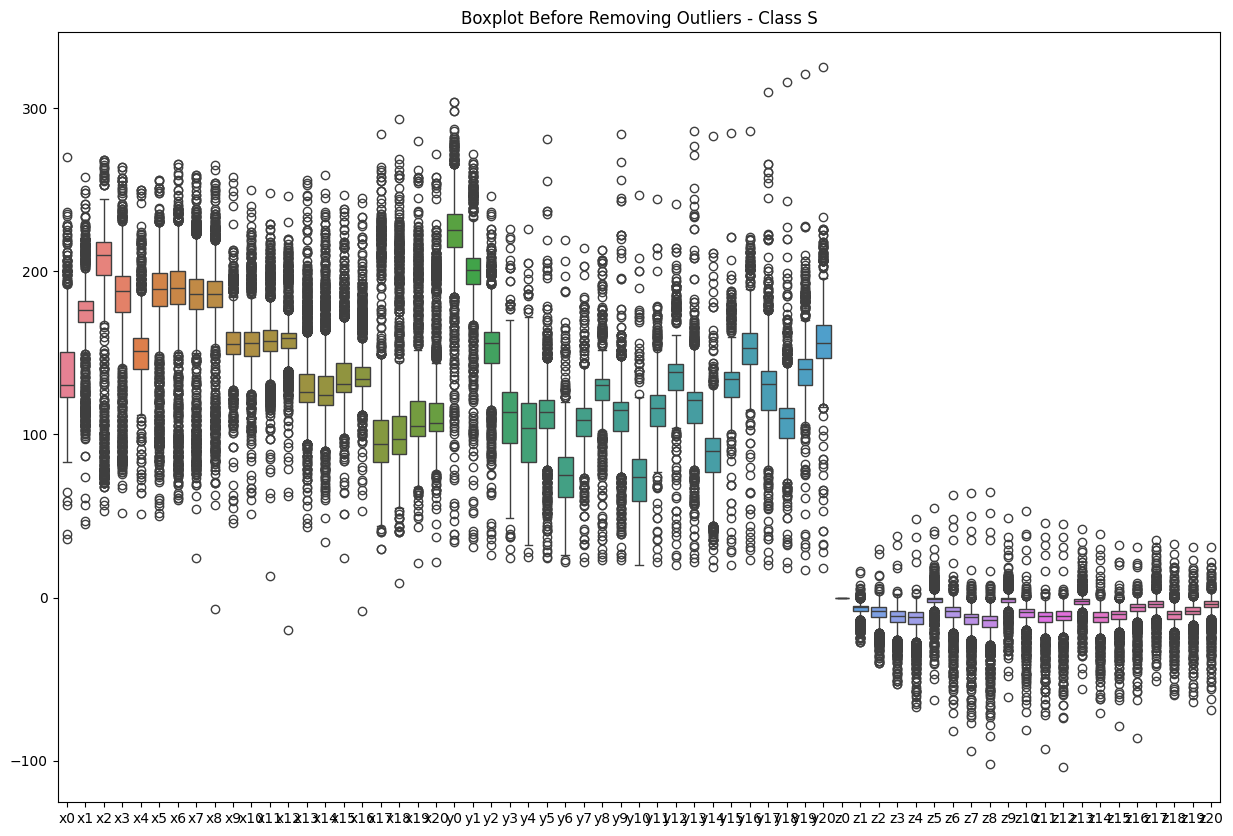

Number of eliment in S : 1328
Number of outliers in S : 266
Number of Non outliers in S : 1062


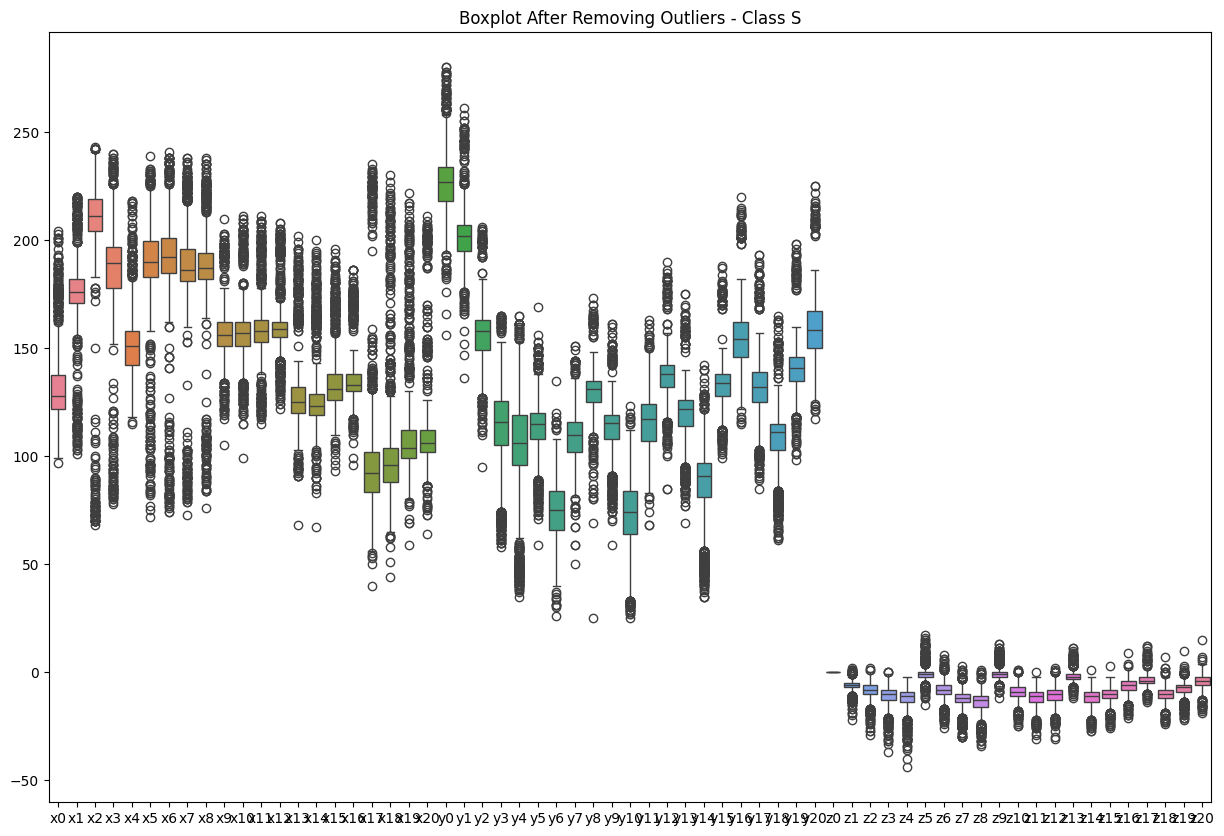

Processing class: G


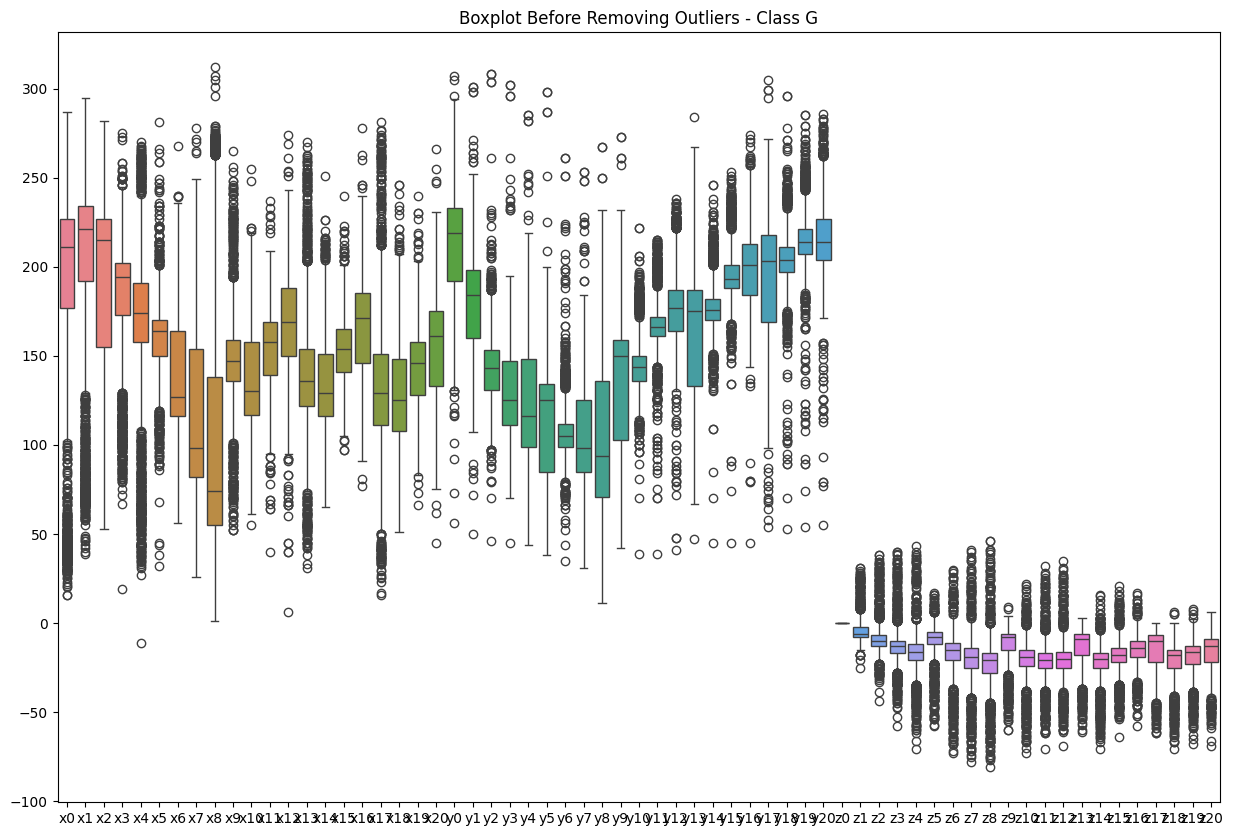

Number of eliment in G : 1589
Number of outliers in G : 318
Number of Non outliers in G : 1271


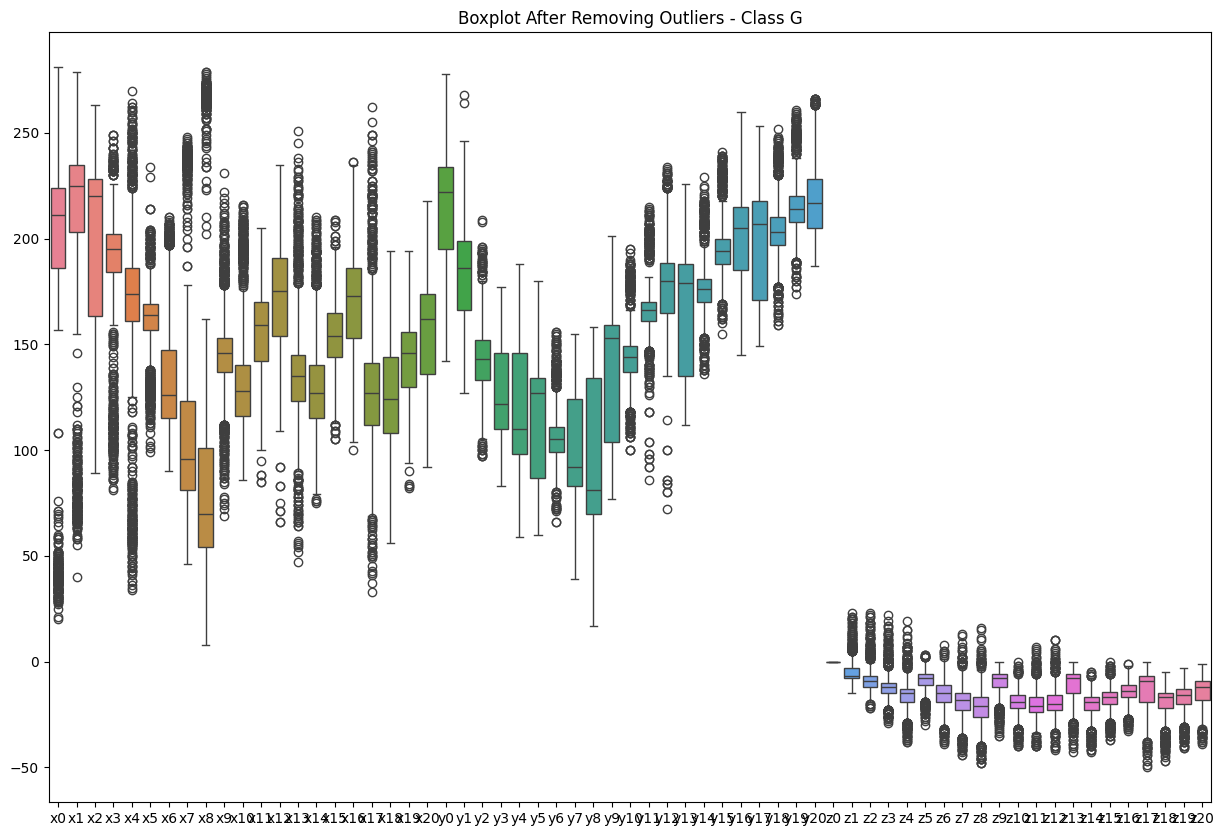

Processing class: A


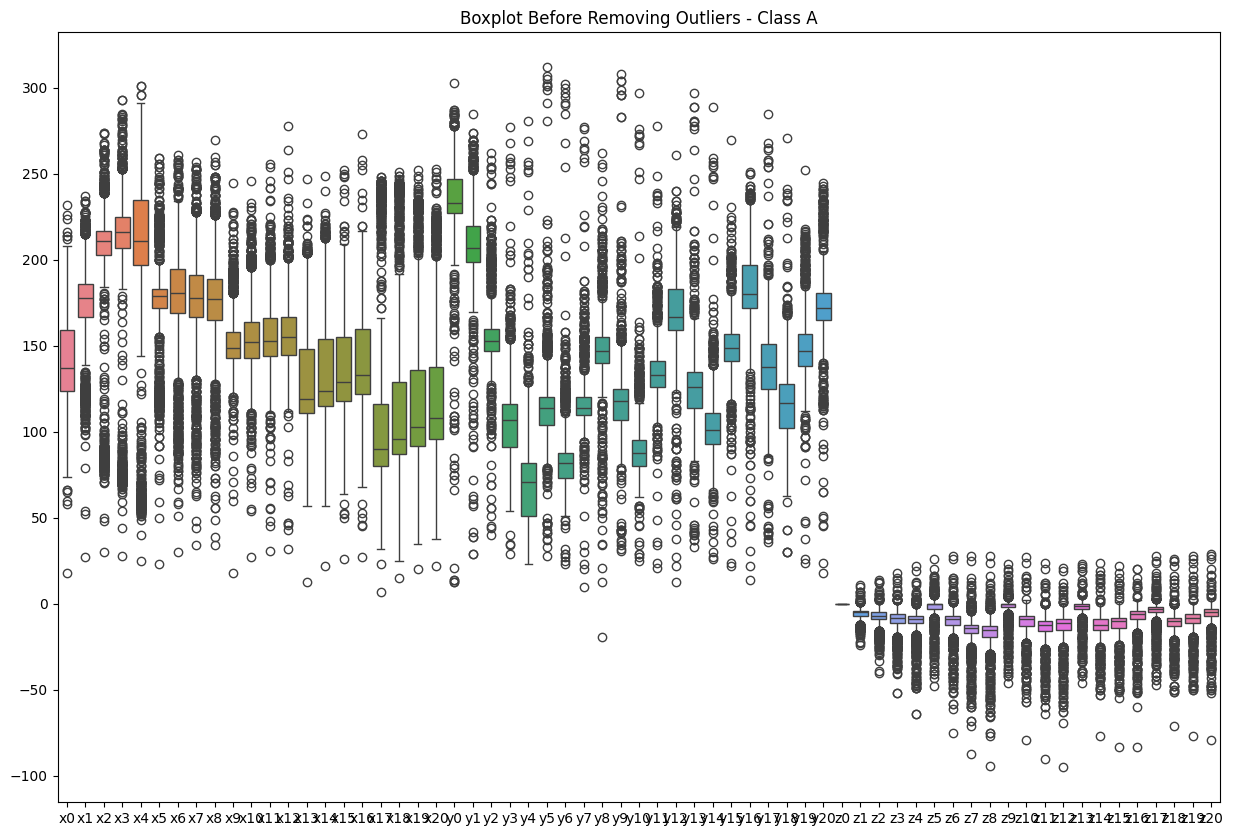

Number of eliment in A : 1419
Number of outliers in A : 284
Number of Non outliers in A : 1135


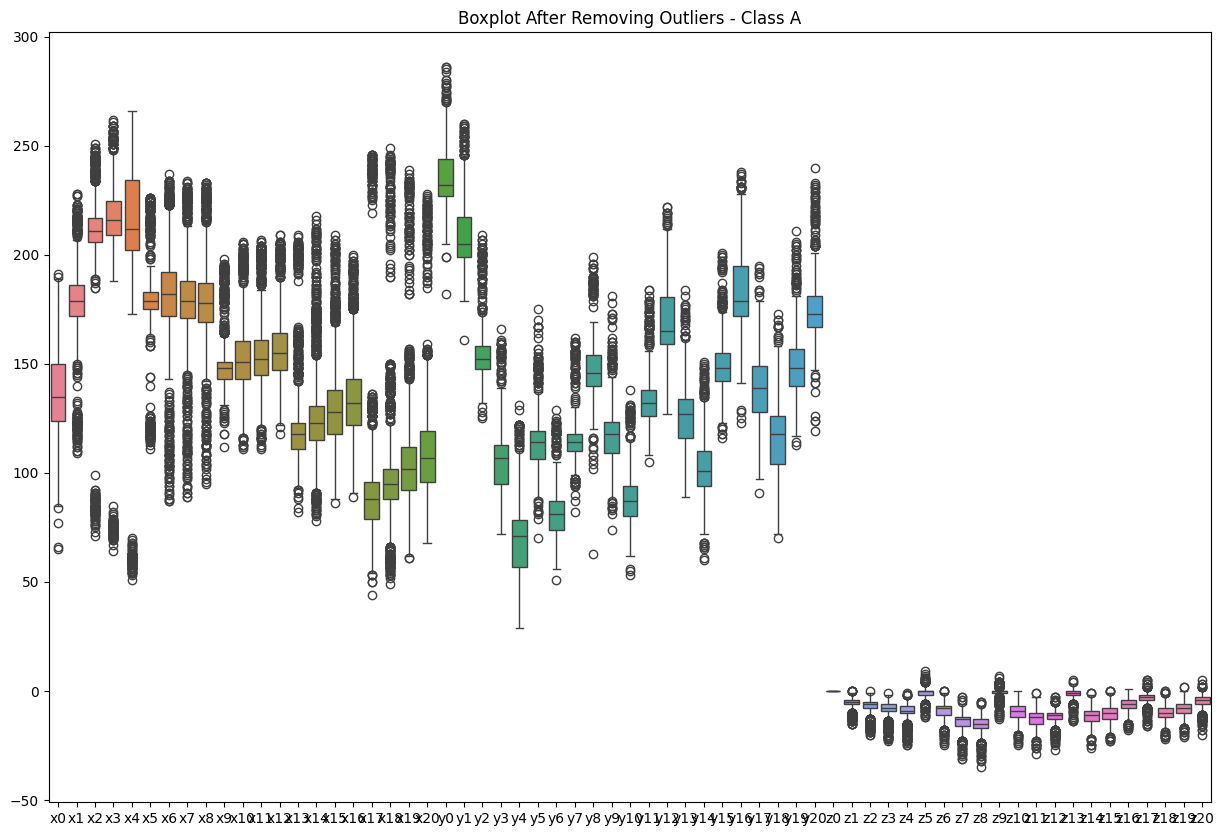

Processing class: O


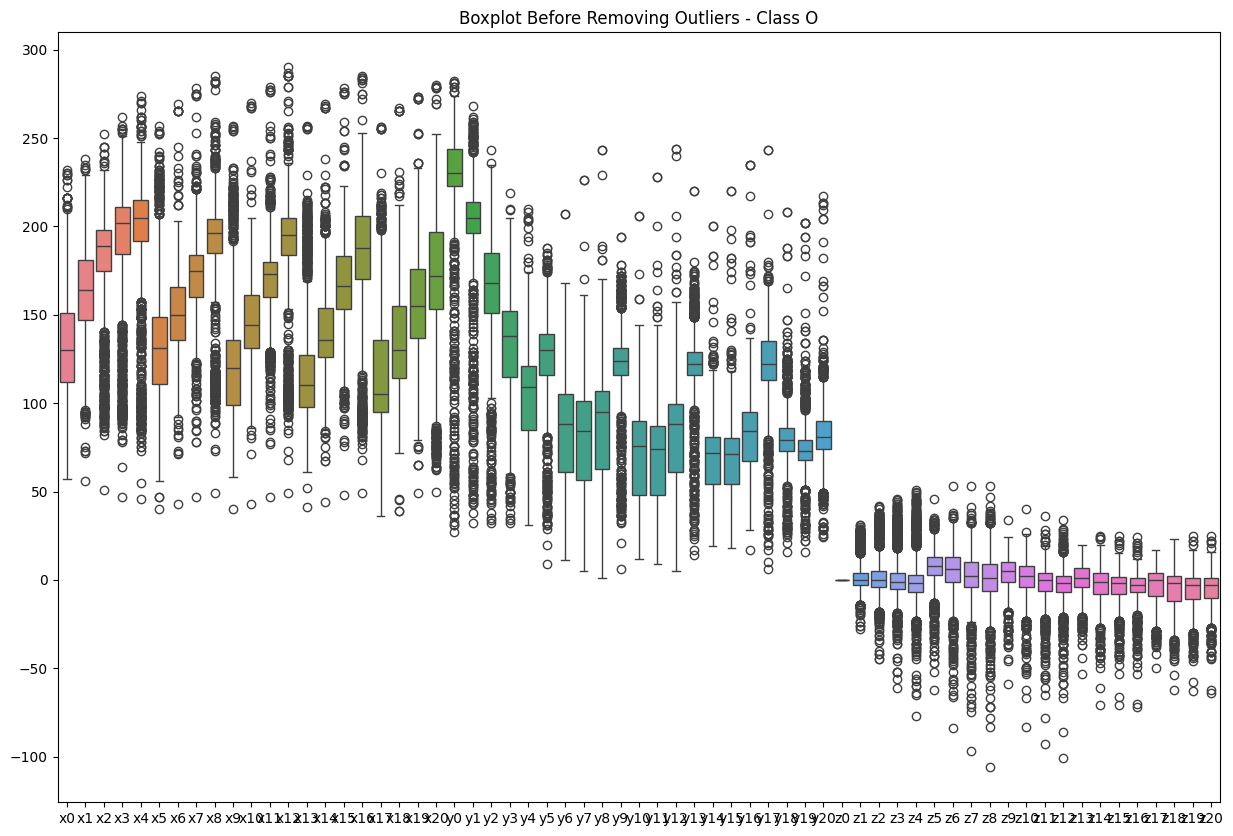

Number of eliment in O : 1386
Number of outliers in O : 276
Number of Non outliers in O : 1110


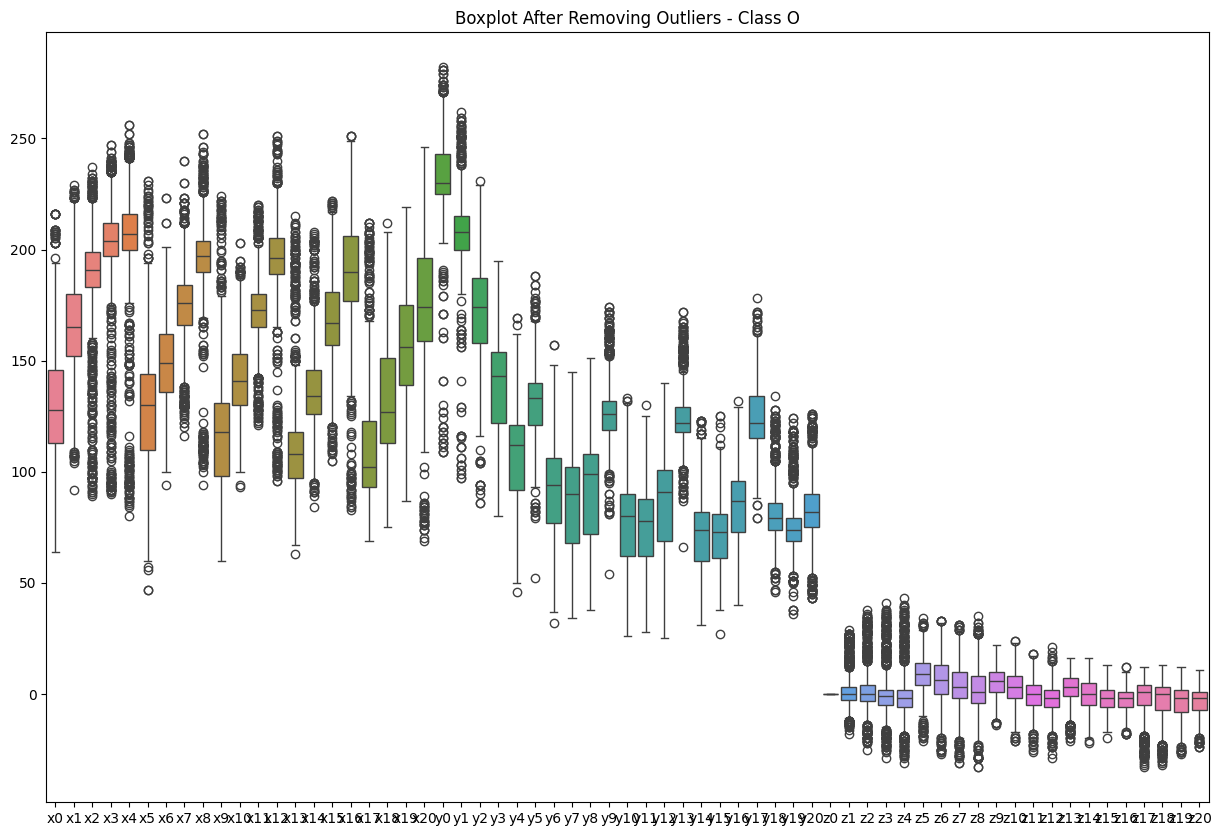

Processing class: T


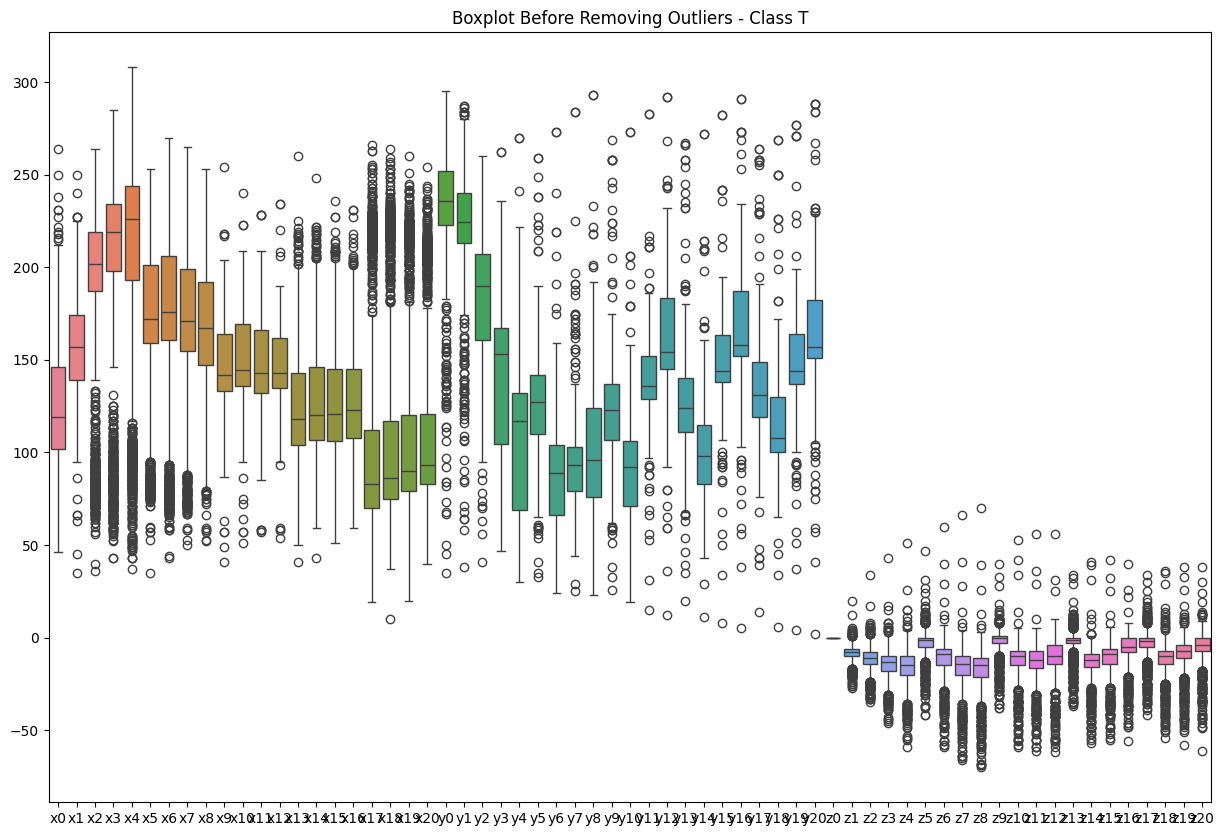

Number of eliment in T : 1476
Number of outliers in T : 294
Number of Non outliers in T : 1182


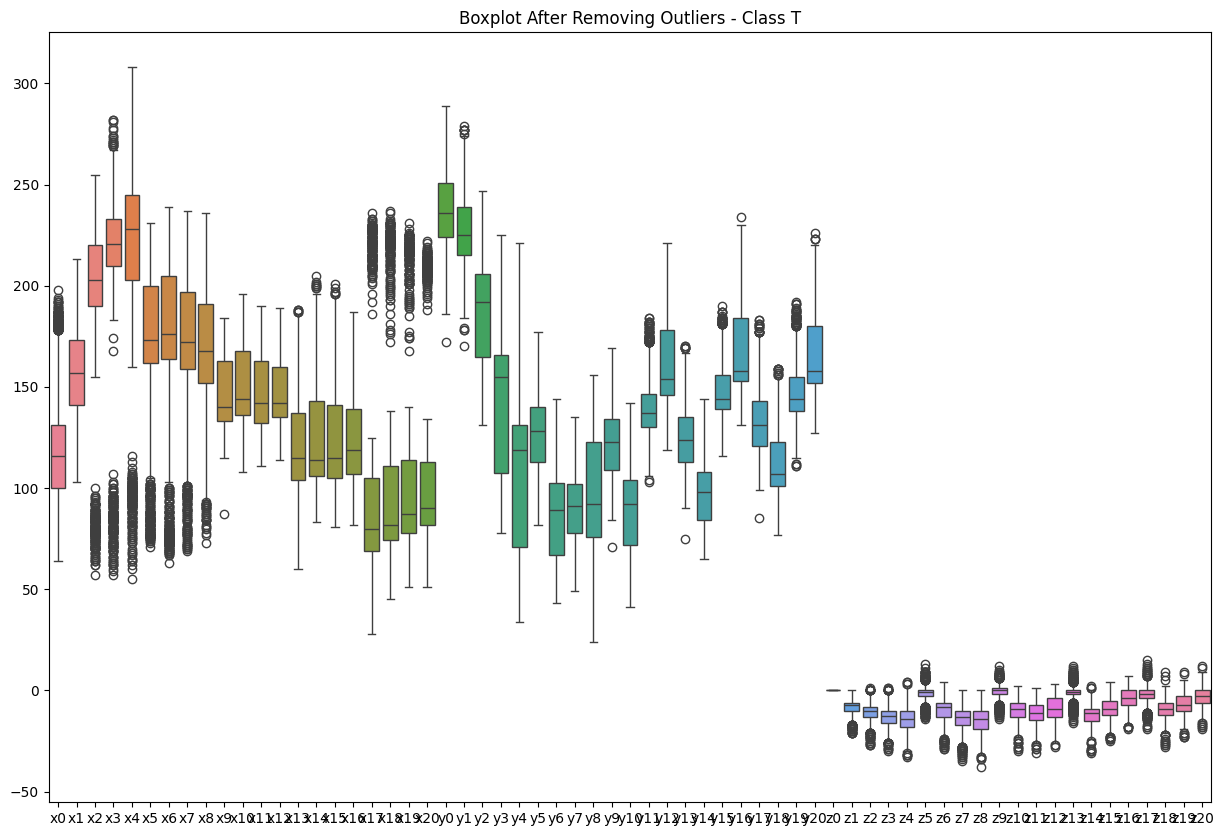

Processing class: V


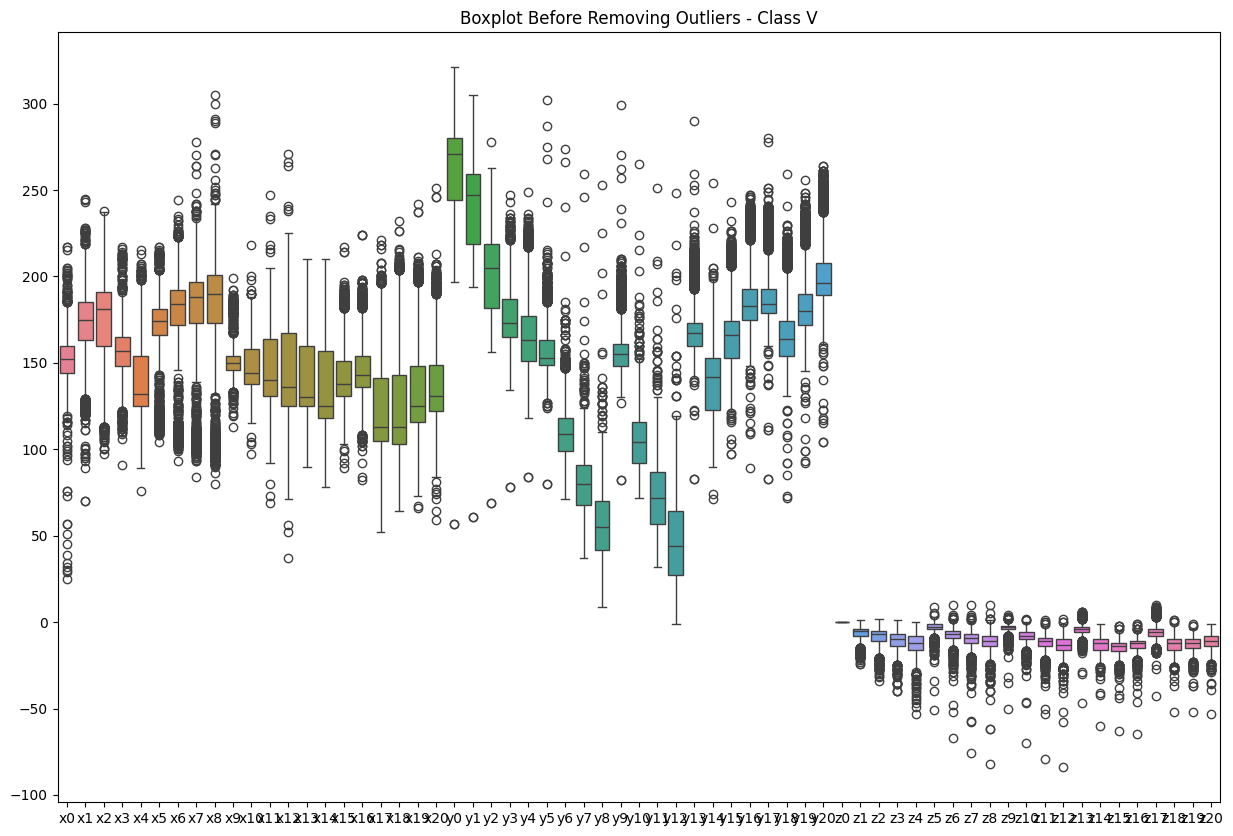

Number of eliment in V : 1581
Number of outliers in V : 316
Number of Non outliers in V : 1265


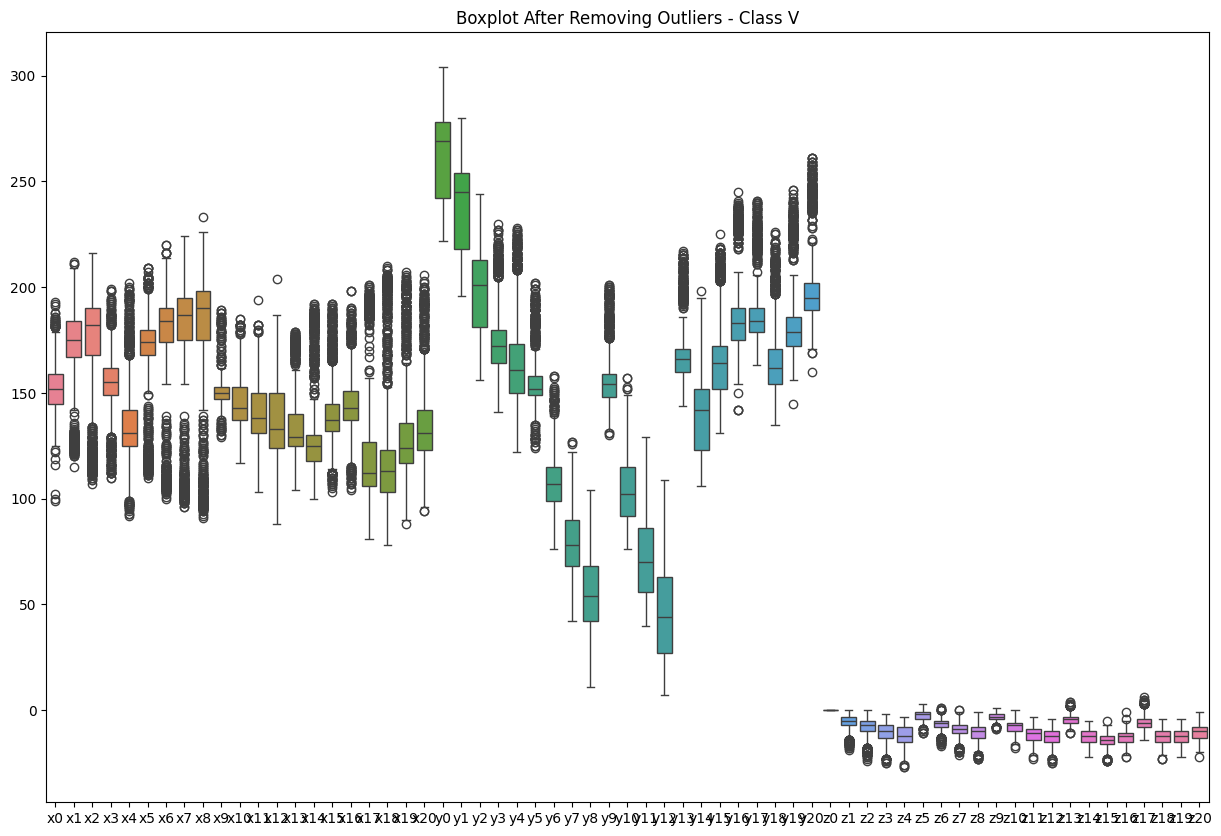

Processing class: Z


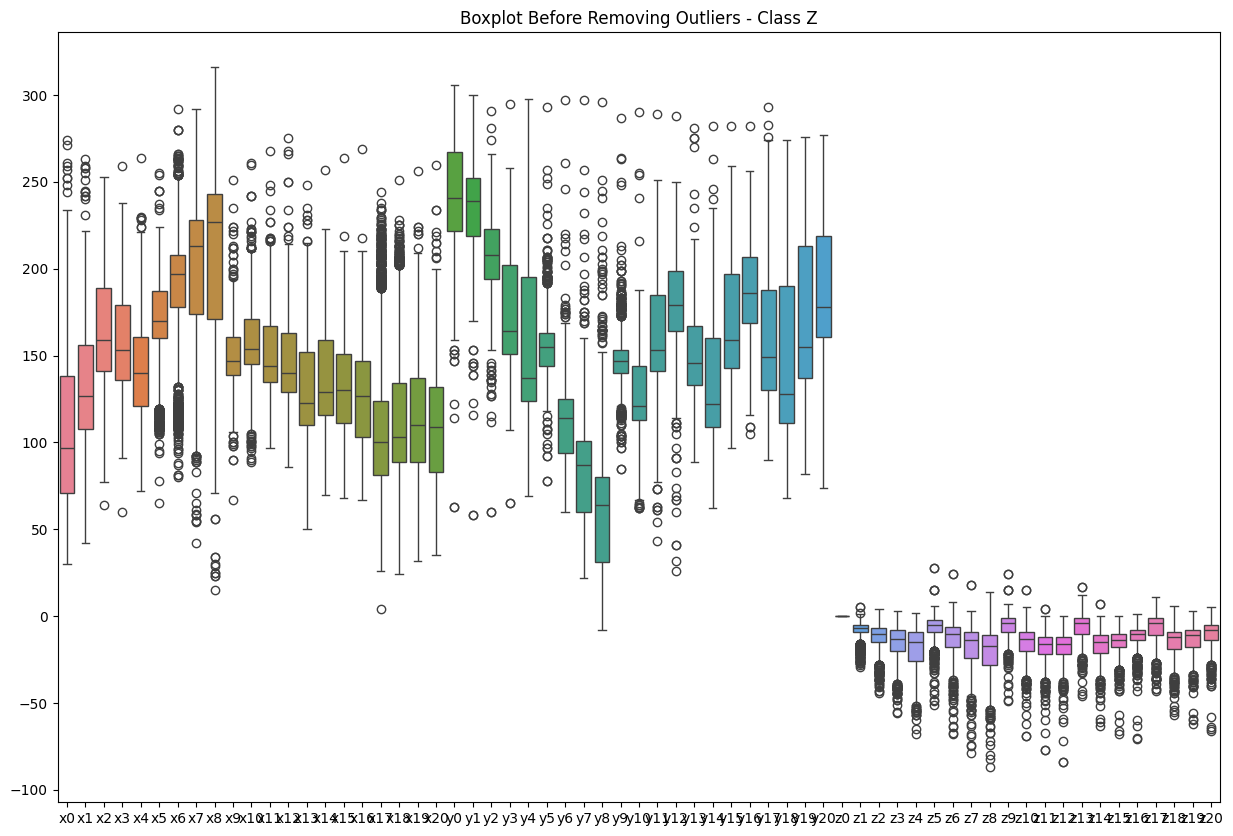

Number of eliment in Z : 1517
Number of outliers in Z : 303
Number of Non outliers in Z : 1214


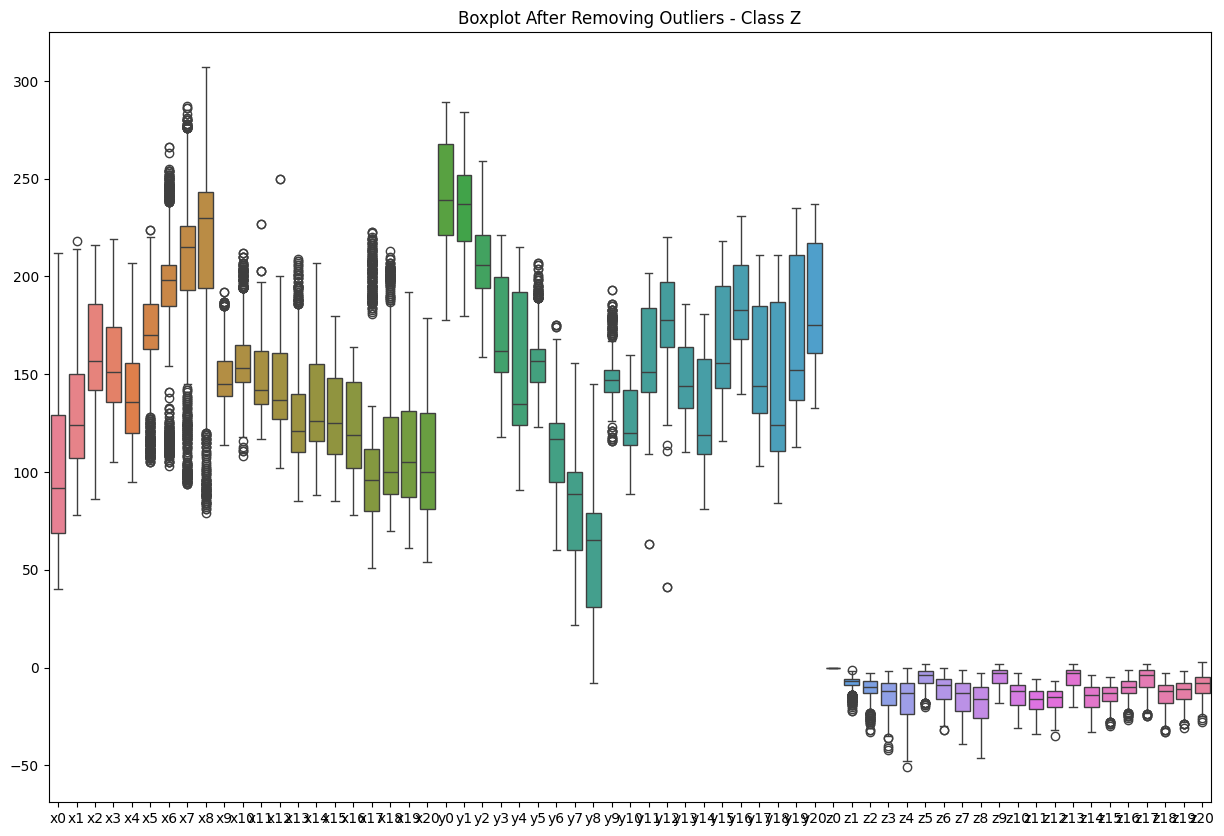

Processing class: C


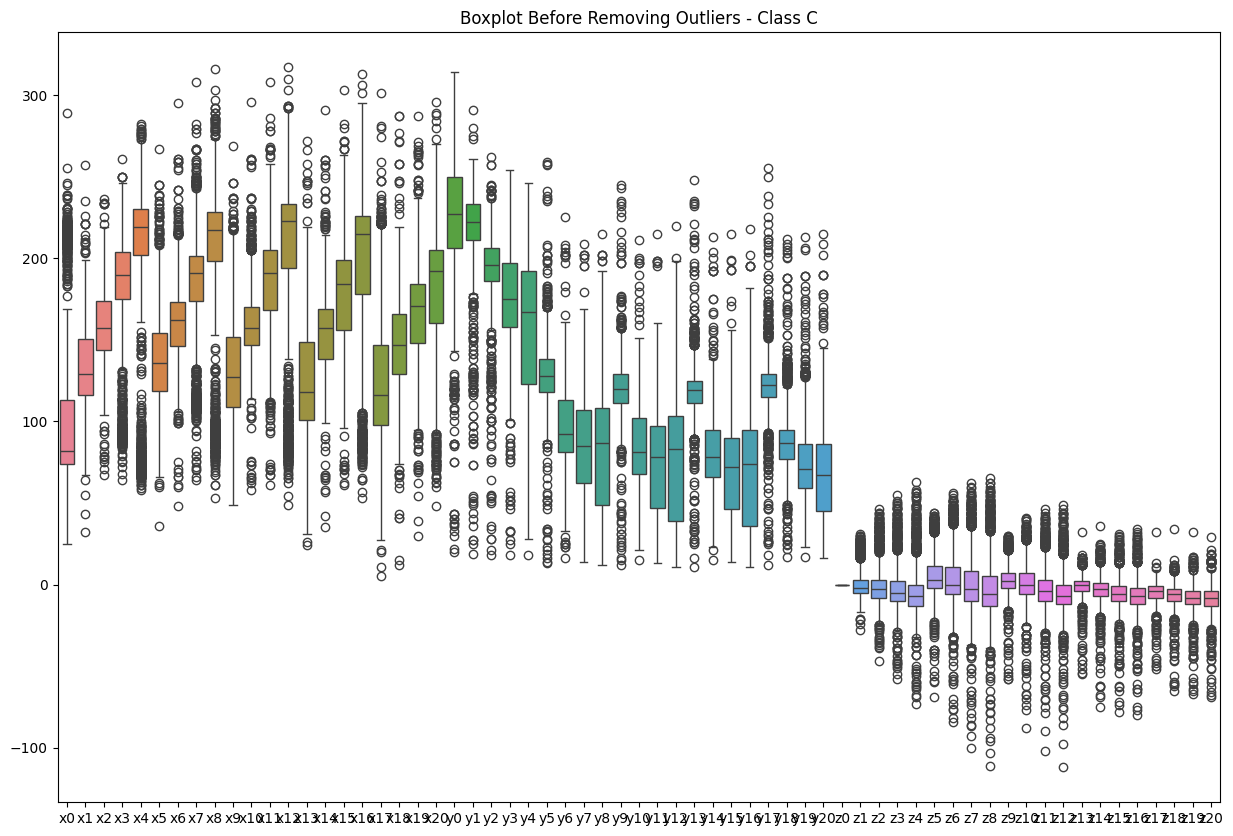

Number of eliment in C : 1567
Number of outliers in C : 313
Number of Non outliers in C : 1254


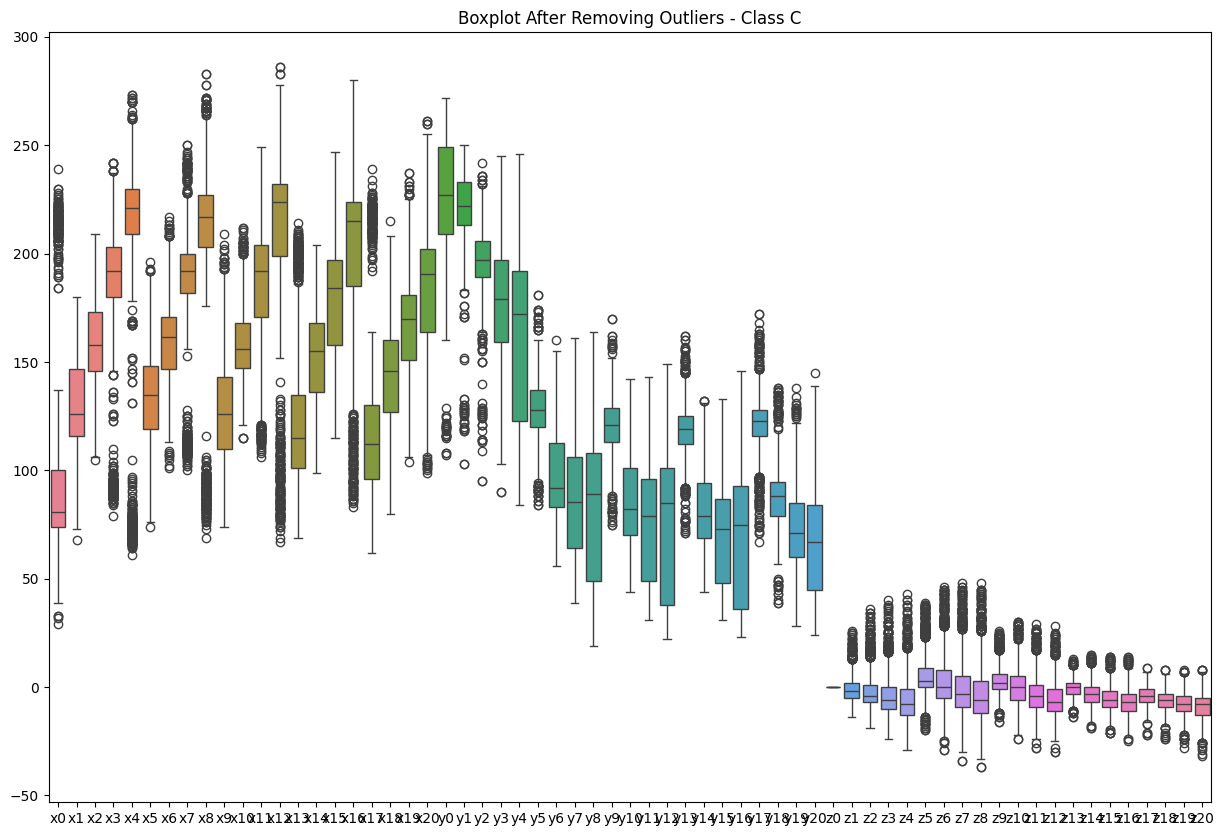

Processing class: P


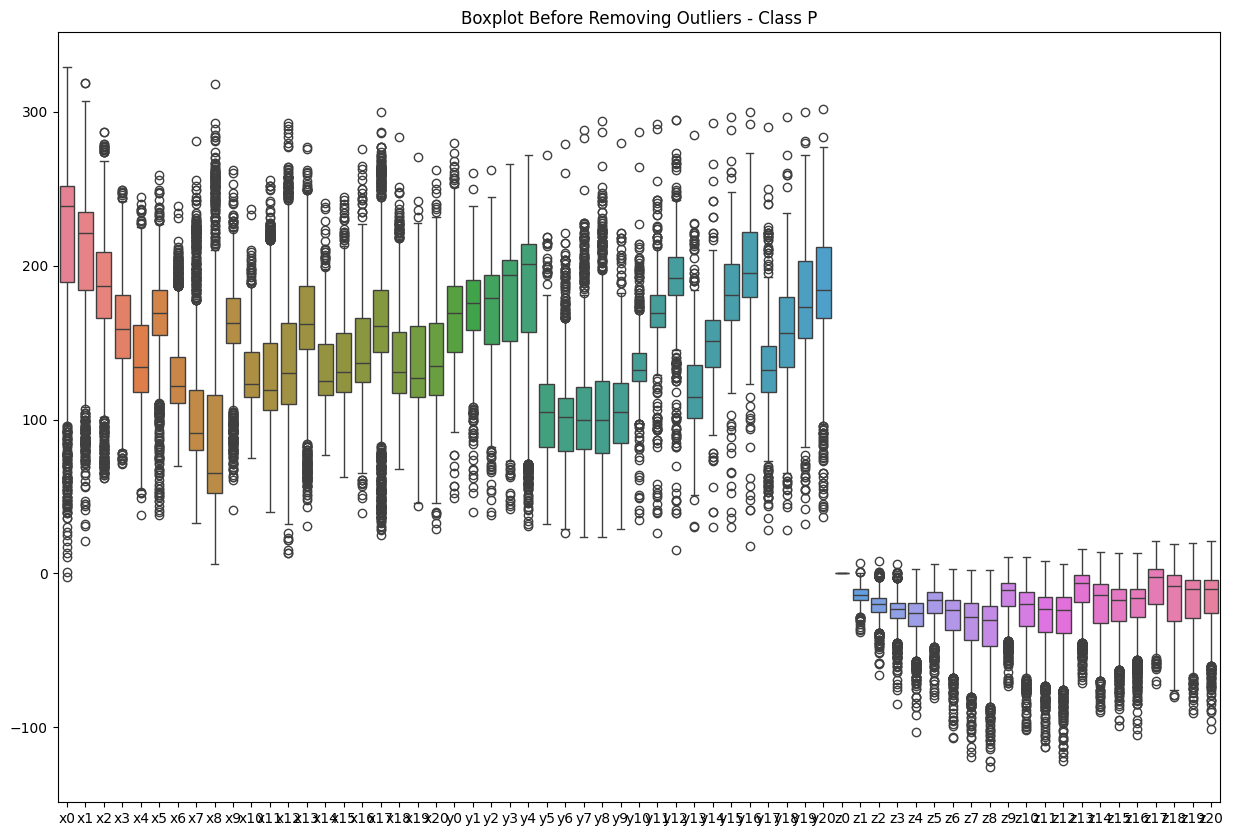

Number of eliment in P : 1476
Number of outliers in P : 295
Number of Non outliers in P : 1181


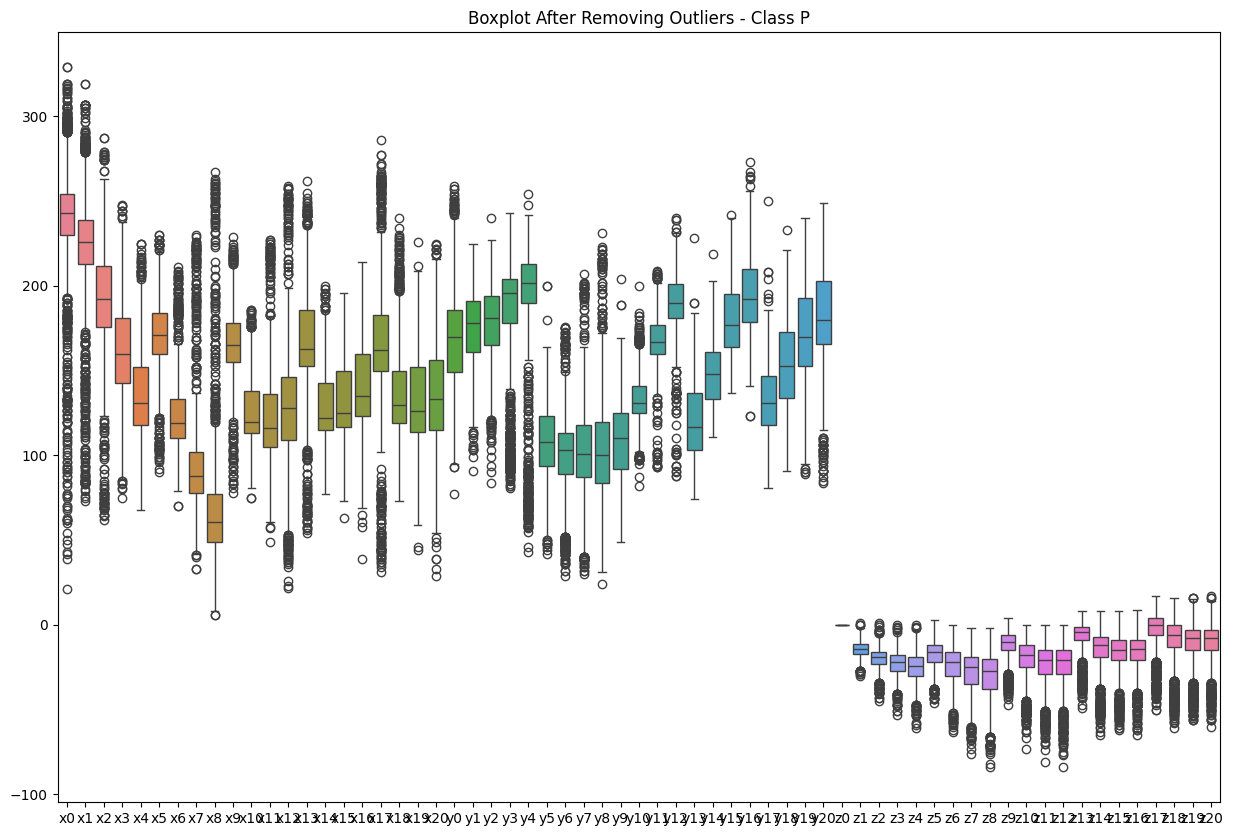

Processing class: L


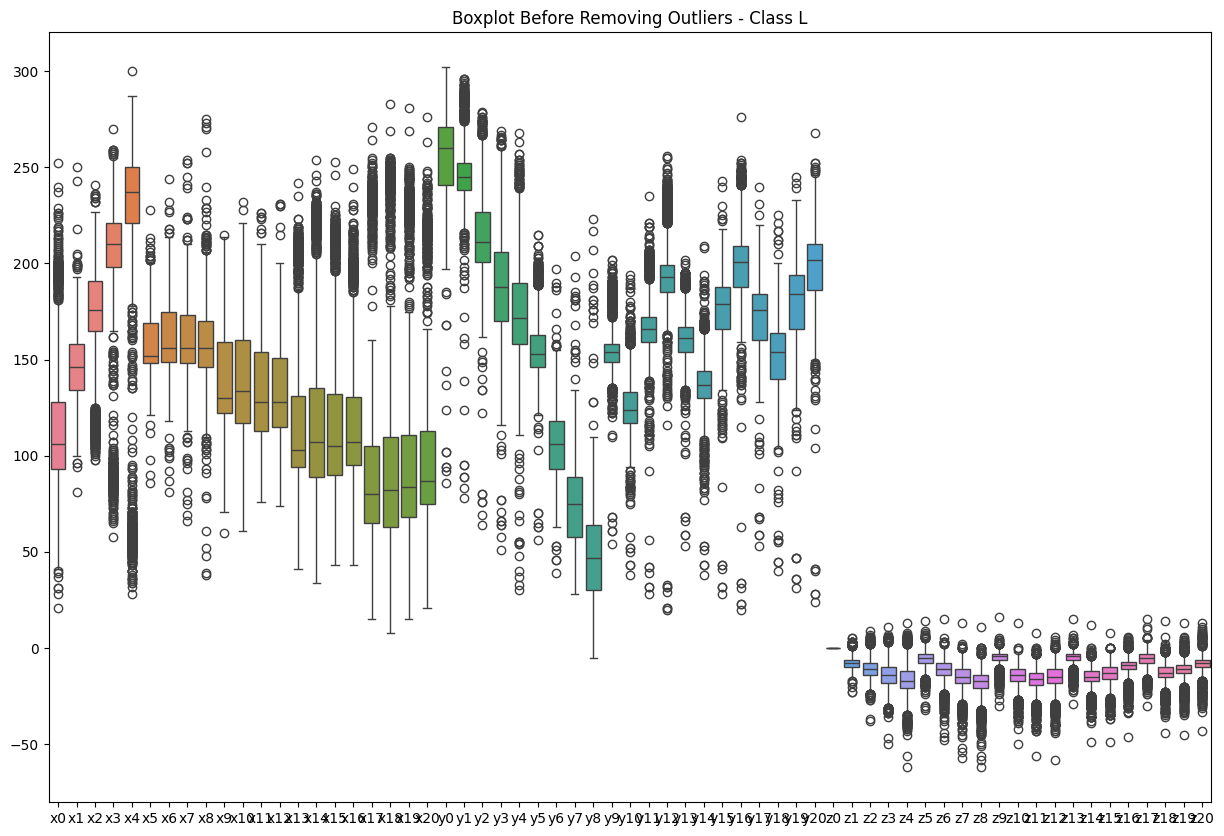

Number of eliment in L : 1590
Number of outliers in L : 318
Number of Non outliers in L : 1272


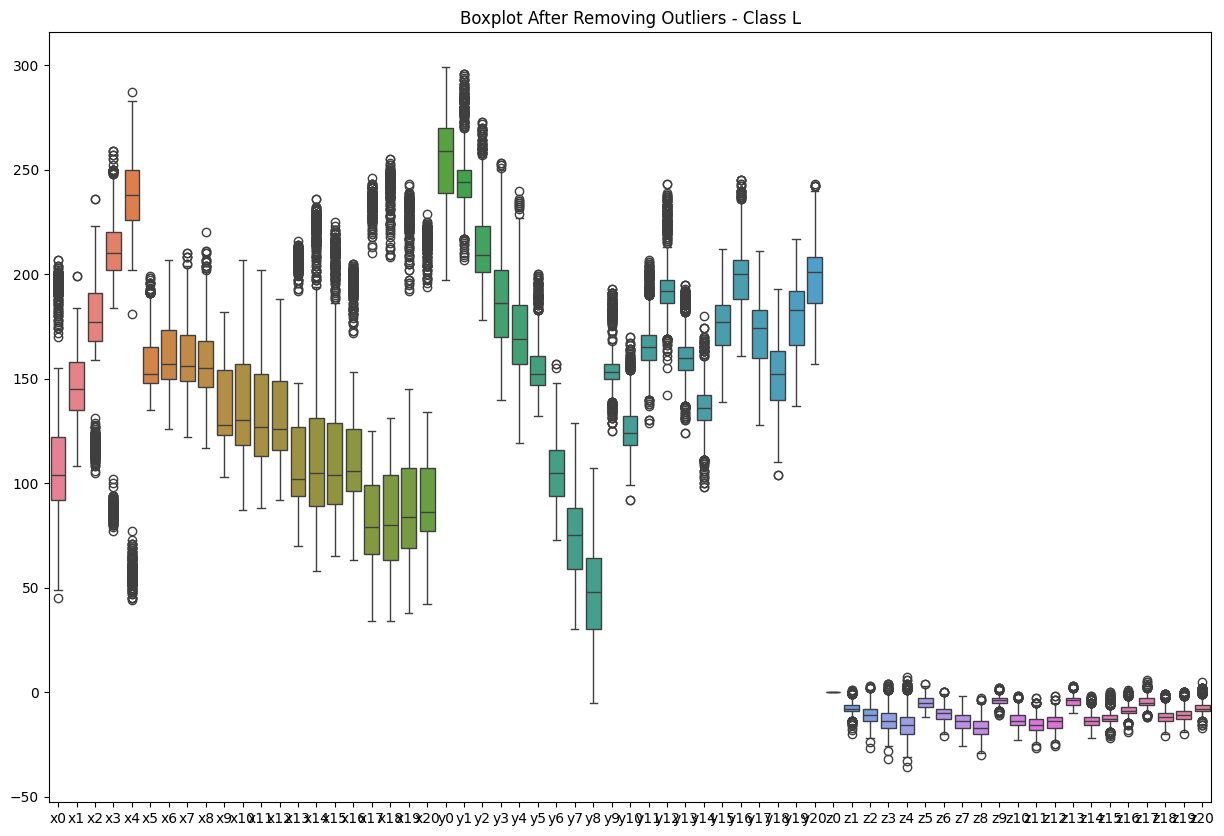

Processing class: W


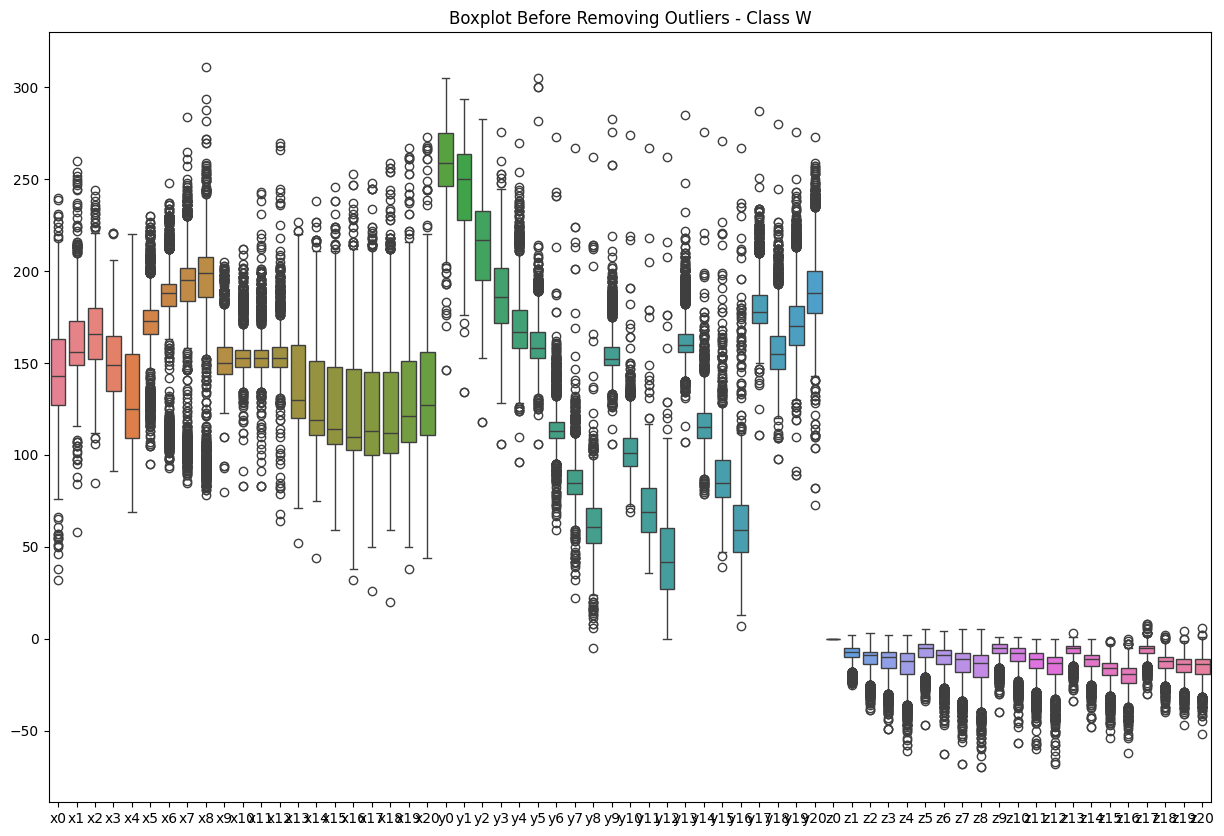

Number of eliment in W : 1579
Number of outliers in W : 316
Number of Non outliers in W : 1263


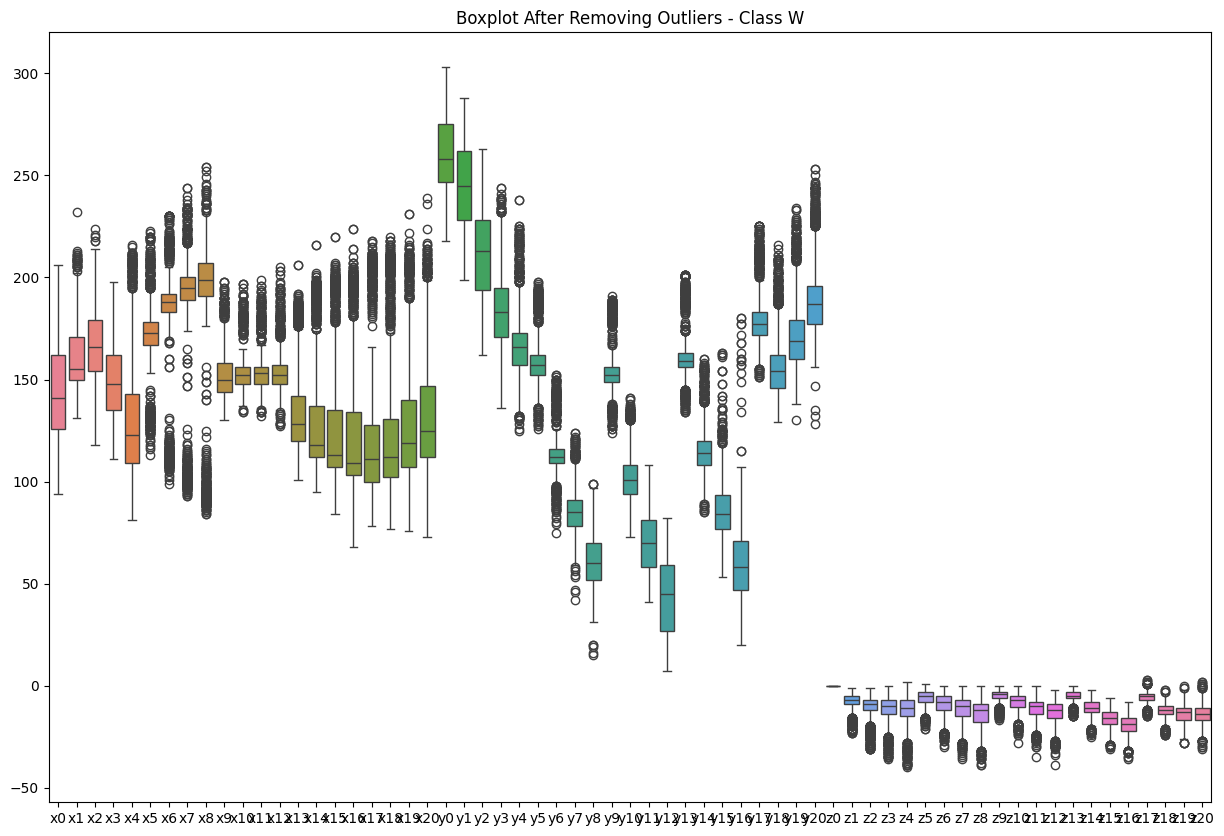

Processing class: D


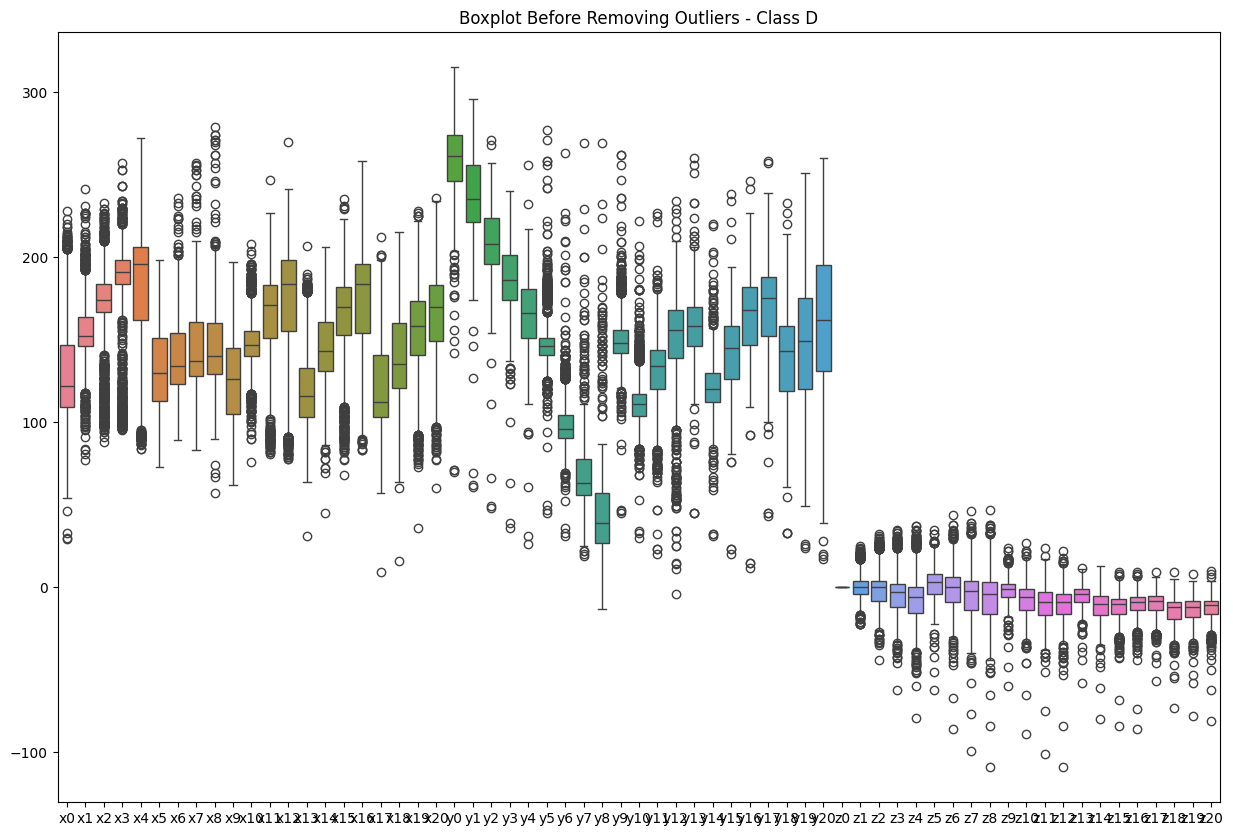

Number of eliment in D : 1571
Number of outliers in D : 314
Number of Non outliers in D : 1257


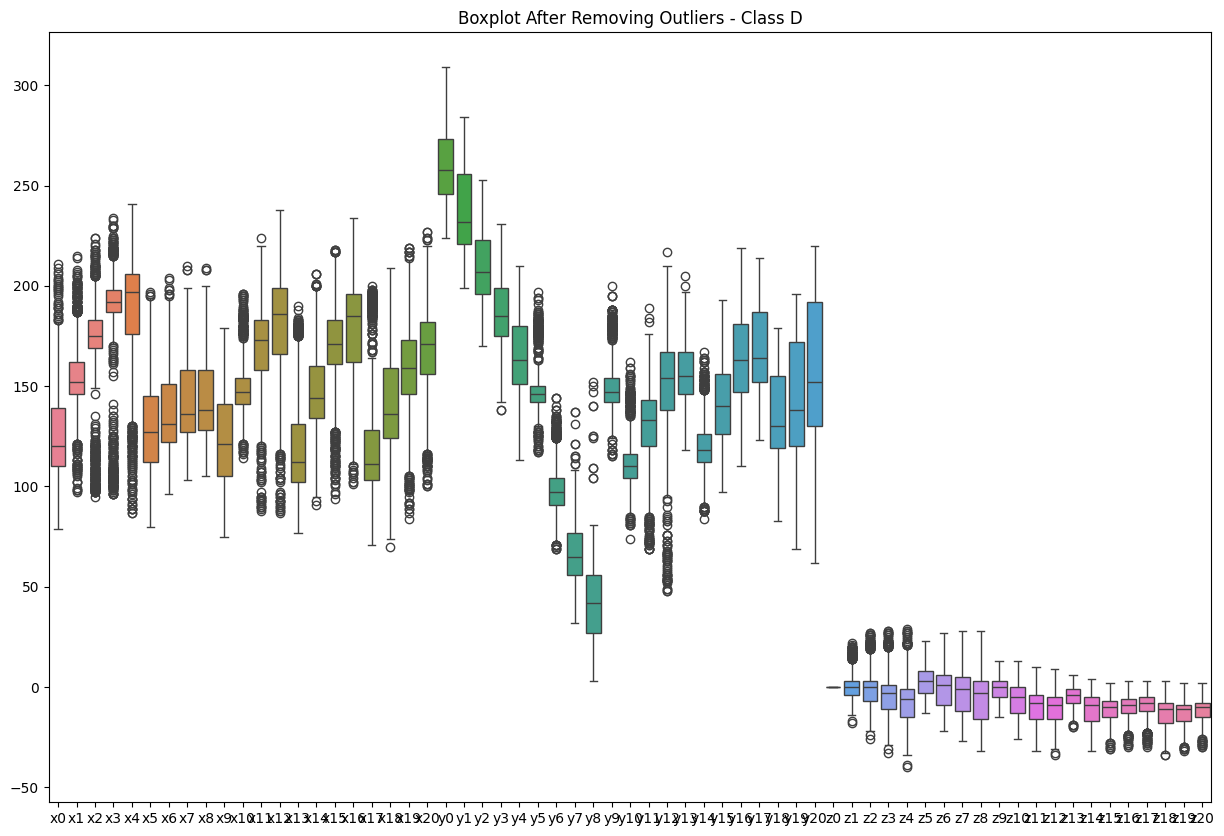

Processing class: J


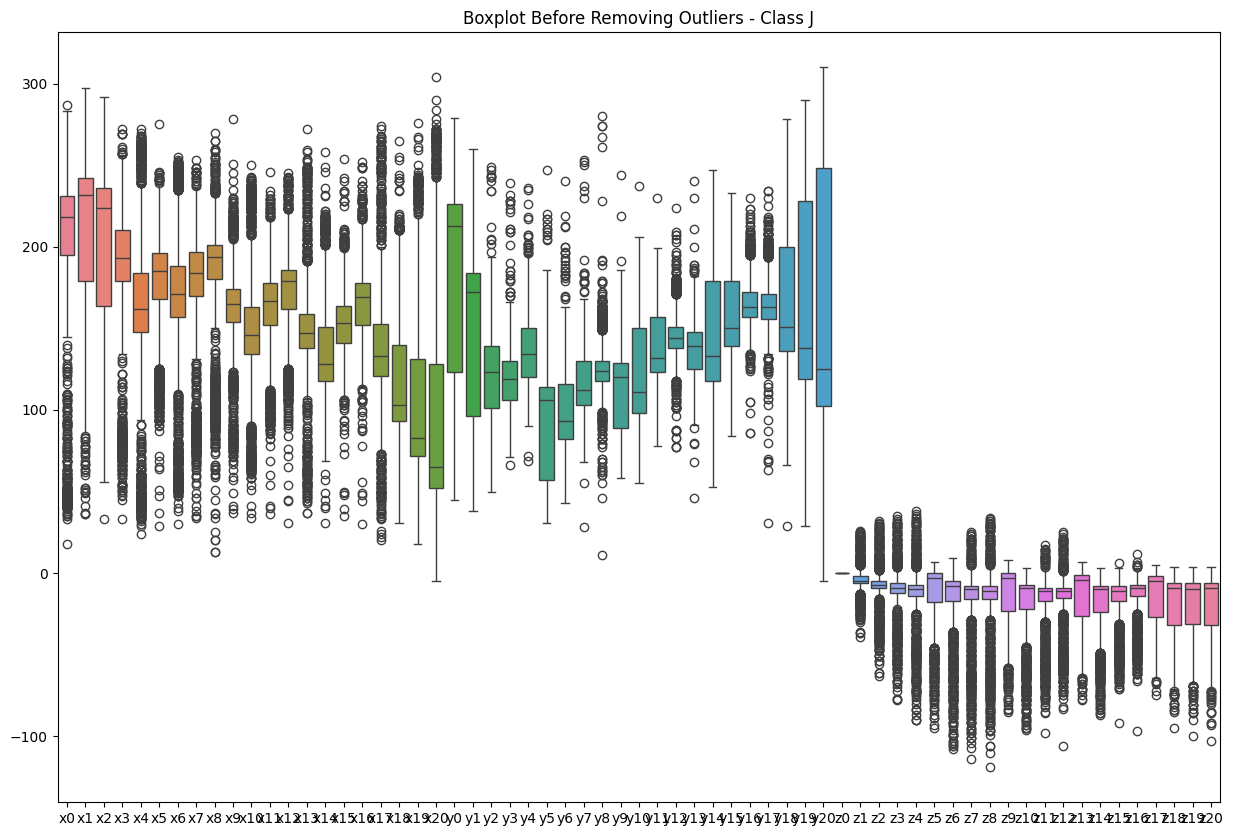

Number of eliment in J : 1570
Number of outliers in J : 314
Number of Non outliers in J : 1256


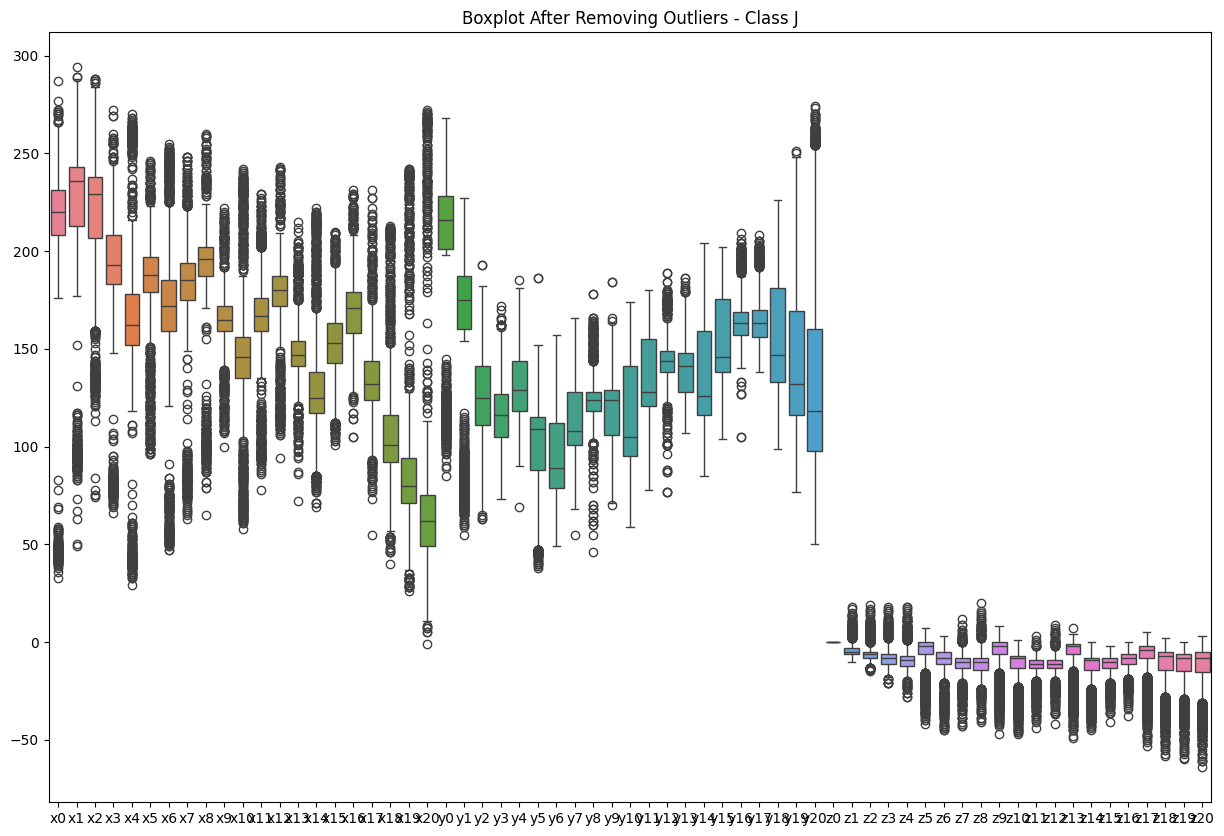

                  x0            x1            x2            x3            x4  \
count   33175.000000  33175.000000  33175.000000  33175.000000  33175.000000   
unique           NaN           NaN           NaN           NaN           NaN   
top              NaN           NaN           NaN           NaN           NaN   
freq             NaN           NaN           NaN           NaN           NaN   
mean      154.645034    174.160482    183.114996    175.520874    164.010158   
std        49.094333     40.769093     40.639858     41.006210     48.678045   
min        19.000000     38.000000     57.000000     45.000000     29.000000   
25%       126.000000    150.000000    167.000000    153.000000    132.000000   
50%       148.000000    176.000000    192.000000    179.000000    155.000000   
75%       177.000000    197.000000    210.000000    205.000000    203.000000   
max       329.000000    319.000000    288.000000    298.000000    308.000000   

                  x5            x6     

In [ ]:
outliers_ISO=main_exploratory(df)